# <p style="text-align: center;">Surprise Housing</p>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

##### The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

##### Business Goal 
To understand previous housing Sales and predict which variables are mostly effecting Sale prices in australia. So that they can 
accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing necesssary libraries
import pandas as pd
import numpy as np

# importing data visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# imorting regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# importing statistical metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading csv data as a dataframe
pd.set_option("display.max_columns", None)
housing = pd.read_csv('train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# shape of dataframe
housing.shape

(1460, 81)

In [4]:
# list of columns of a dataframe
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
# Mean of missing values in housing dataset
dic = {}
for i in housing.columns:
    if i not in dic:
        dic[i] = round(100 * housing[i].isna().mean(),2)
for k,v in dic.items():
    if v != 0:
        print(str(k) + "  :  " + str(v))

LotFrontage  :  17.74
Alley  :  93.77
MasVnrType  :  59.73
MasVnrArea  :  0.55
BsmtQual  :  2.53
BsmtCond  :  2.53
BsmtExposure  :  2.6
BsmtFinType1  :  2.53
BsmtFinType2  :  2.6
Electrical  :  0.07
FireplaceQu  :  47.26
GarageType  :  5.55
GarageYrBlt  :  5.55
GarageFinish  :  5.55
GarageQual  :  5.55
GarageCond  :  5.55
PoolQC  :  99.52
Fence  :  80.75
MiscFeature  :  96.3


In [8]:
drop_them1 = ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
# dropping columns with more than 50% missing values
housing.drop(drop_them1,axis=1,inplace=True)

In [10]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd       350.0        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ         706          Unf   
1       Gd       TA           Gd          ALQ         978          Unf   
2       Gd       TA           Mn          GLQ         486          Unf   
3       TA       Gd           No          ALQ         216          Unf   
4       Gd       TA           Av          GLQ         655          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0        150          856    GasA        Ex          Y      SBrkr   
1           0        284         1262    GasA        Ex          Y      SBrkr   
2           0        434          920    GasA        Ex          Y      SBrkr   
3           0        540          756    GasA        Gd          Y      SBrkr   
4           0        490         1145    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   
1         2         0             3             1          TA             6   
2         2         1             3             1          Gd             6   
3         1         0             3             1          Gd             7   
4         2         1             4             1          Gd             9   

  Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0        Typ           0         NaN     Attchd       2003.0          RFn   
1        Typ           1          TA     Attchd       1976.0       

In [11]:
# number of unique values in each column
dic = {}
for i in housing.columns:
    if i not in dic:
        dic[i] = housing[i].nunique()
for k,v in dic.items():
    print(k,":", v)

Id : 1460
MSSubClass : 15
MSZoning : 5
LotFrontage : 110
LotArea : 1073
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrArea : 327
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinSF1 : 637
BsmtFinType2 : 6
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
FireplaceQu : 5
GarageType : 6
GarageYrBlt : 97
GarageFinish : 3
GarageCars : 5
GarageArea : 441
GarageQual : 5
GarageCond : 5
PavedDrive : 3
WoodDeckSF : 274


In [12]:
# dropping columns with all unique values and one unique value
# data doesn't have columns with 1 unique value
housing.drop('Id', axis=1, inplace=True)

In [13]:
len(housing.columns)

75

### Treating Missing values

In [14]:
# replacing LotFrontage missing values with median
housing.LotFrontage.fillna(housing.LotFrontage.median(),inplace=True)

In [15]:
# missing values from below basement and garage columns are actually no basement and no garage so,
# replacing nobasment and nogarage values to 'NA'
housing.BsmtExposure.fillna('NA', inplace=True)
housing.BsmtQual.fillna('NA', inplace=True)
housing.BsmtCond.fillna('NA', inplace=True)
housing.BsmtFinType1.fillna('NA', inplace=True)
housing.BsmtFinType2.fillna('NA', inplace=True)
housing.GarageType.fillna('NA', inplace=True)
# garageyear built is in numerical format so replacing no garage rows with 0.0
housing.GarageYrBlt.fillna(0.0, inplace=True)
housing.GarageFinish.fillna('NA', inplace=True)
housing.GarageQual.fillna('NA', inplace=True)
housing.GarageCond.fillna('NA', inplace=True)


In [16]:
# Replacing missing values MasVnrArea with median
housing.MasVnrArea.fillna(housing.MasVnrArea.median(), inplace=True)

# Replacing missing values Electrical and FireplaceQu with mode
housing.Electrical.fillna(housing.Electrical.mode()[0], inplace=True)
housing.FireplaceQu.fillna(housing.FireplaceQu.mode()[0], inplace=True)


In [18]:
housing.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [19]:
#lets drop utilities columns as 1459 rows having all public utitlities only one having nosewa
housing.drop('Utilities',axis=1,inplace=True)

In [20]:
# while buying house its important to know its age
housing['sold_age'] = housing['YrSold']-housing['YearBuilt']
# drop yearbuilt and yearsold
housing.drop(['YearBuilt', 'YrSold'], axis=1, inplace=True)
housing.drop('MoSold', axis=1, inplace=True)

In [21]:
# These are categorical variables with numerical values so lets convert them as object type 
to_object = ['BsmtFullBath','BsmtHalfBath',  'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','YearRemodAdd',
             'GarageYrBlt','OverallQual', 'OverallCond','MSSubClass']
housing[to_object] = housing[to_object].astype('object')

In [22]:
# Splitting numerical and categorical columns
housing_num = housing.select_dtypes(include=['float64', 'int64'])
print("Numerical Columns: \n \n",housing_num.columns,"\n")

housing_cat = housing.select_dtypes(include=['object'])
print("categorical Columns: \n\n",housing_cat.columns,"\n")

Numerical Columns: 
 
 Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
       'sold_age'],
      dtype='object') 

categorical Columns: 

 Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'F

In [23]:
# getting value counts of all categorical columns
for i in housing_cat.columns:
    print(housing[i].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740


### Univariate analysis

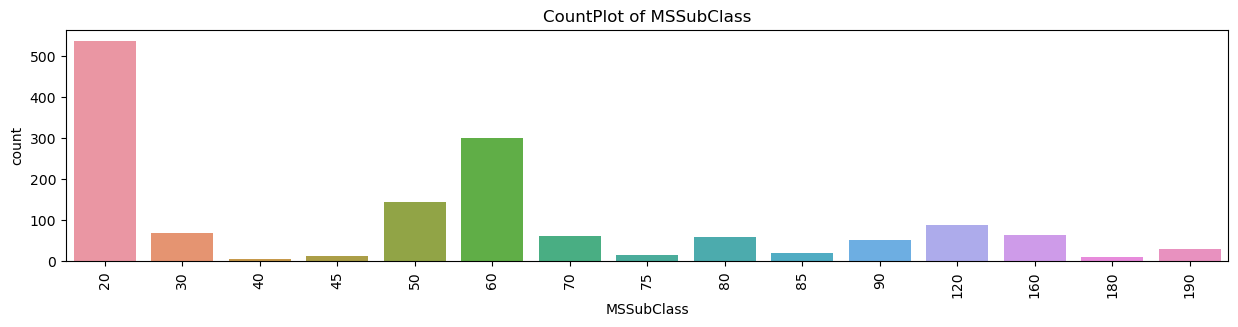

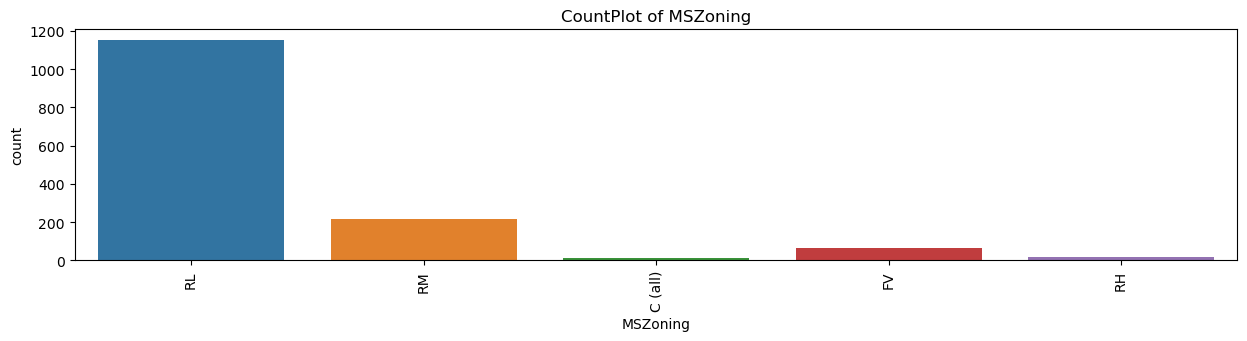

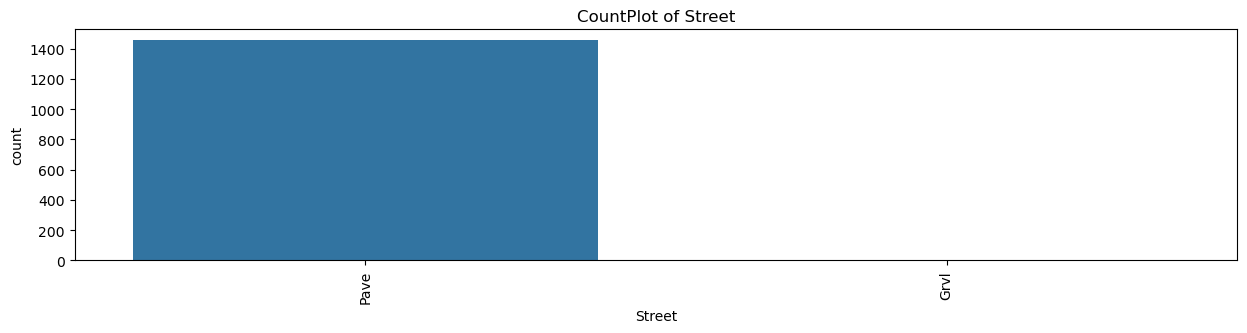

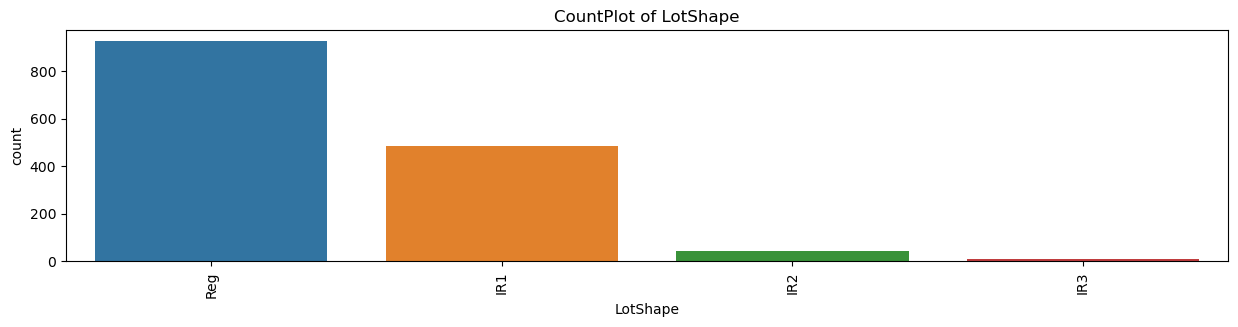

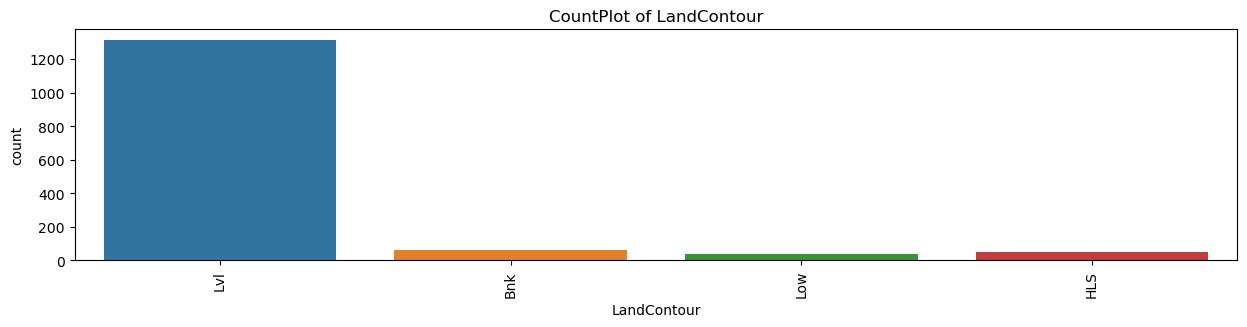

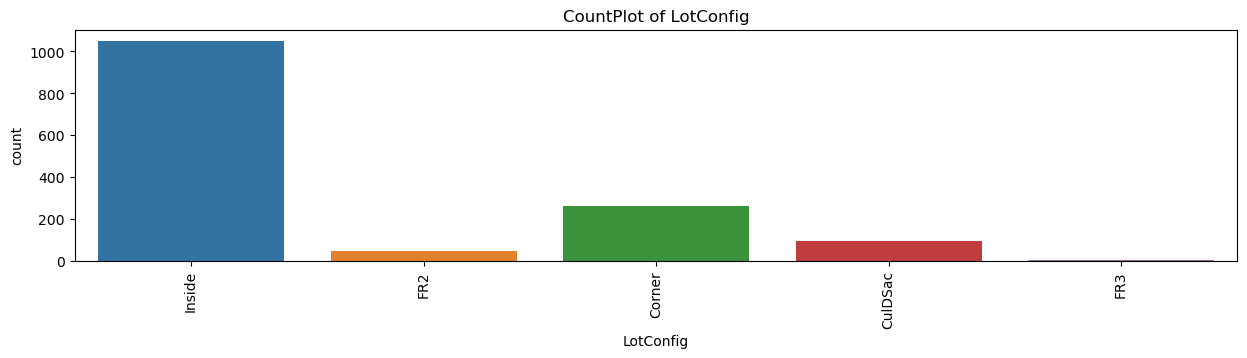

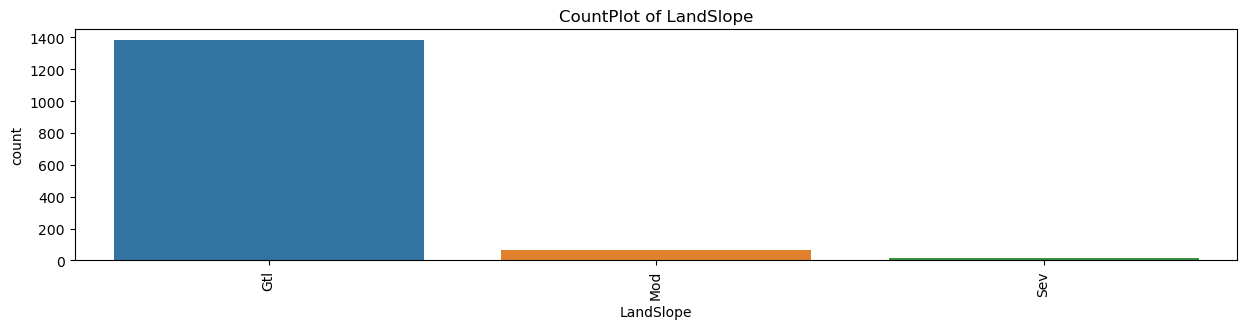

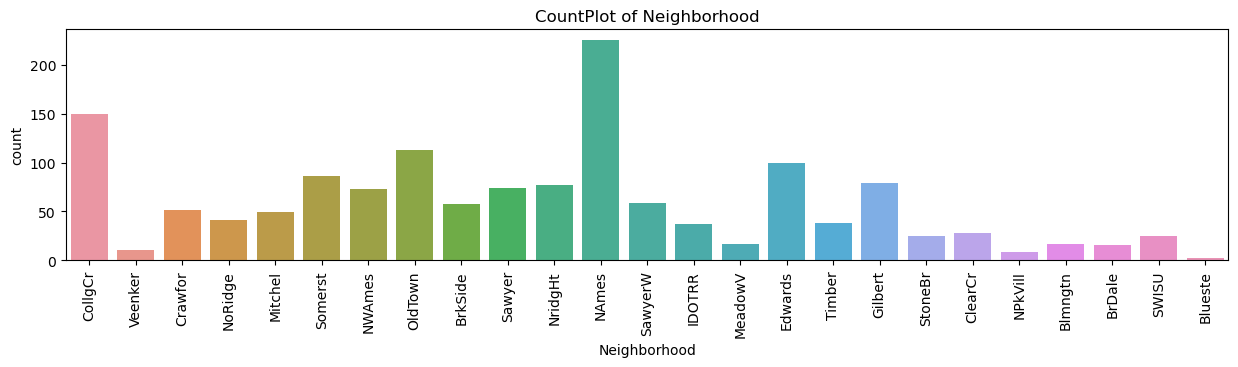

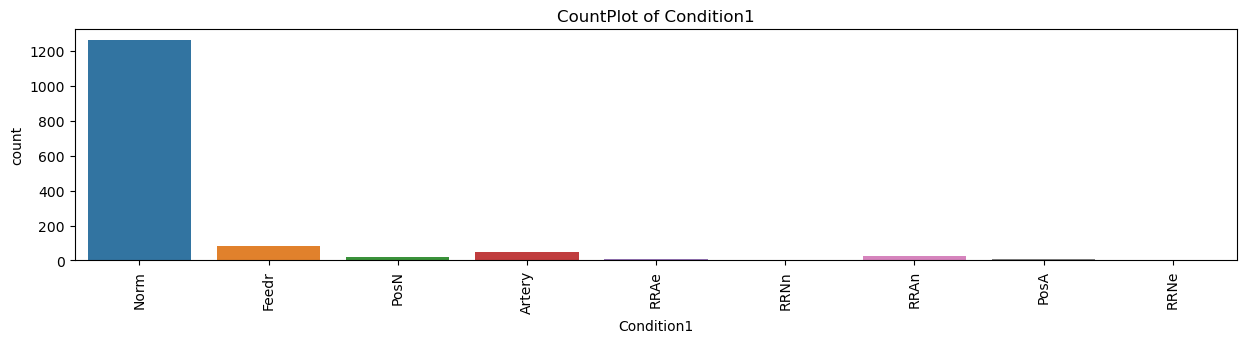

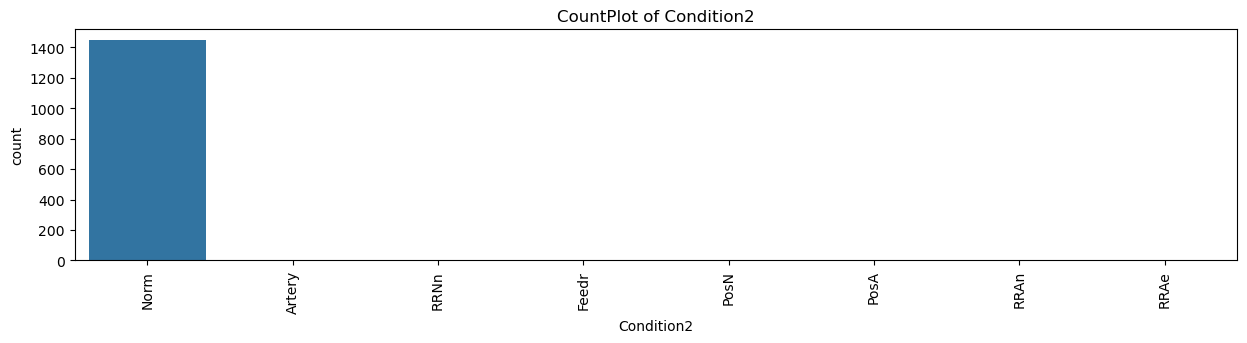

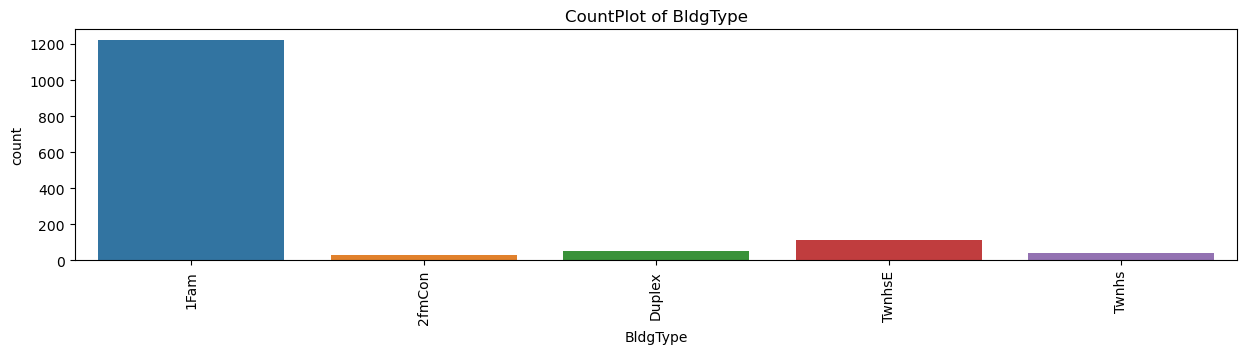

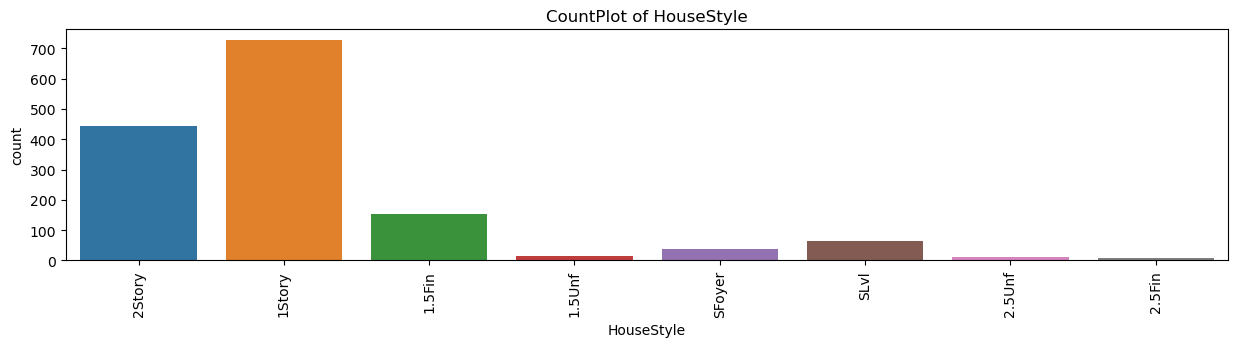

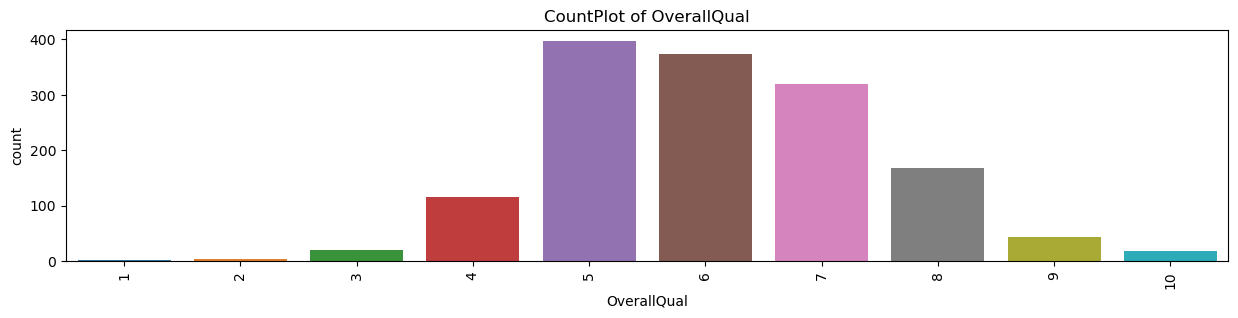

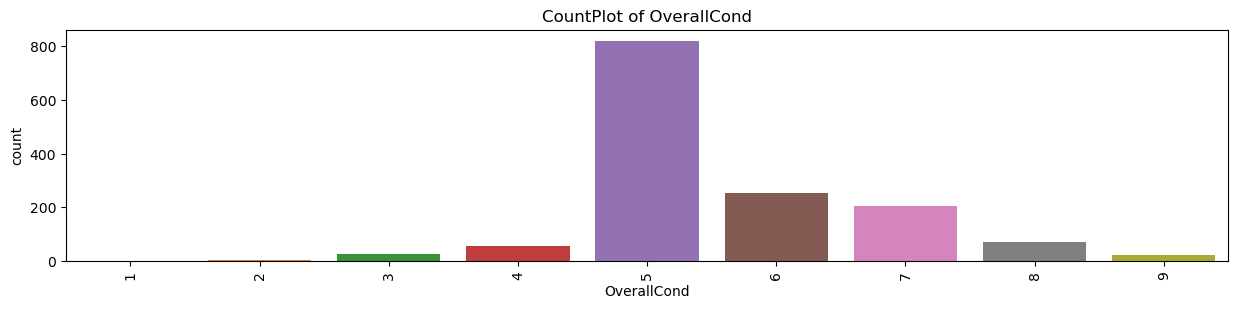

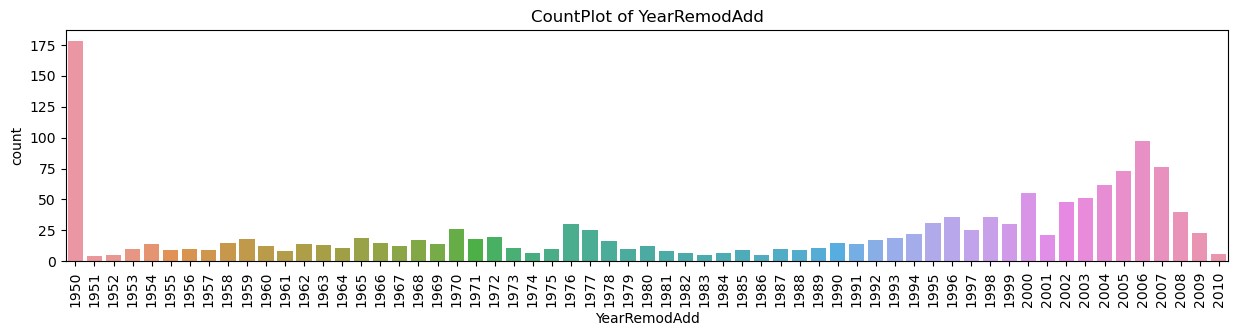

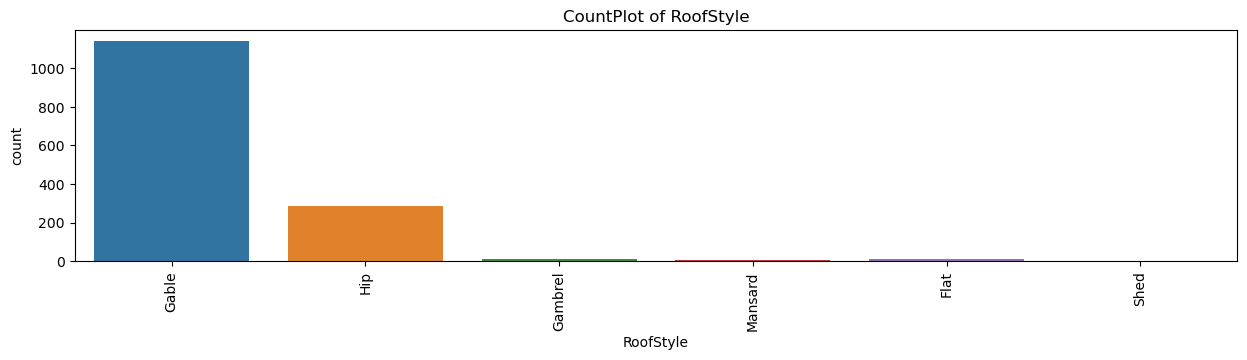

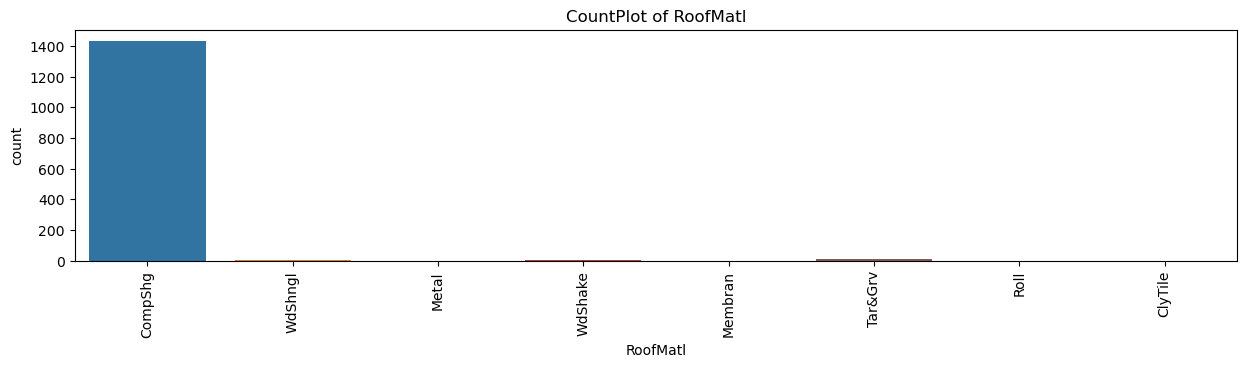

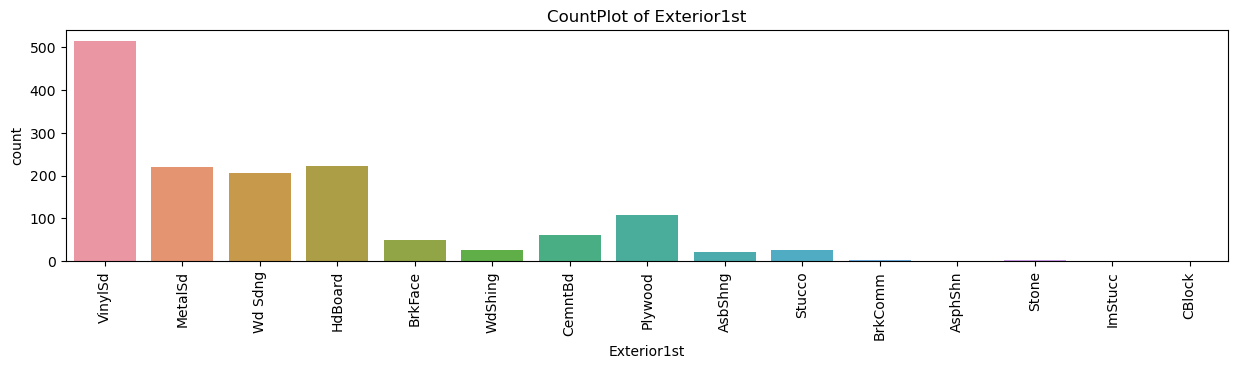

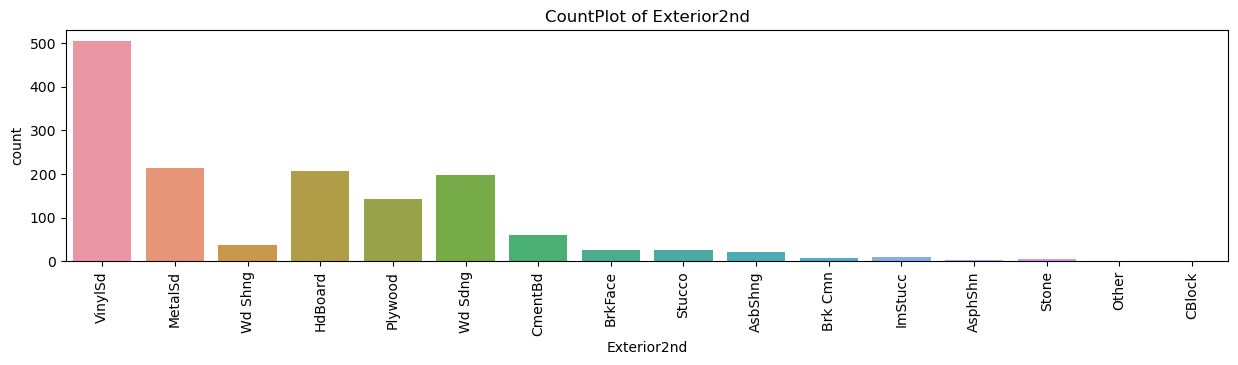

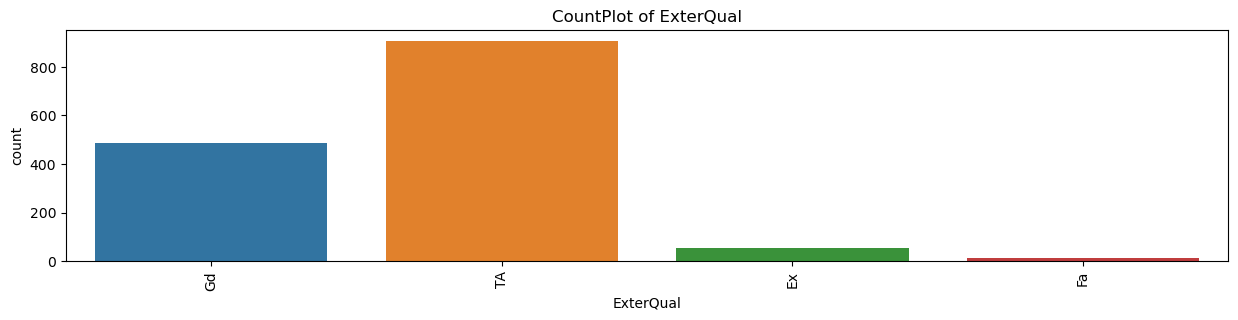

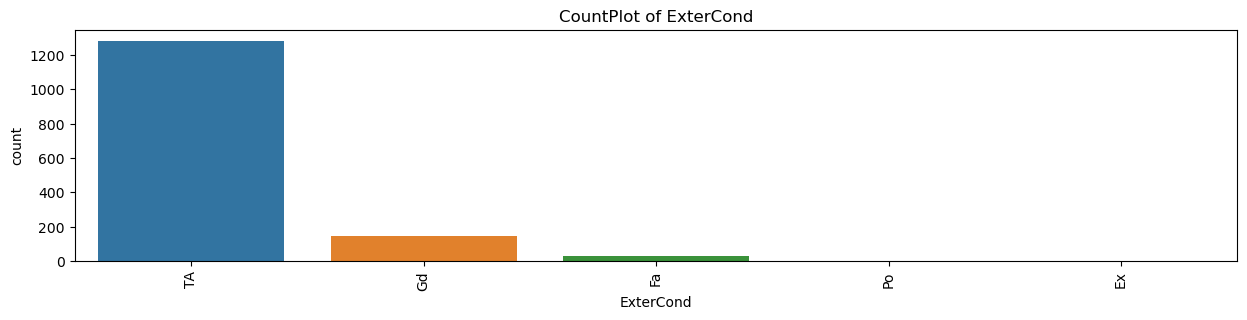

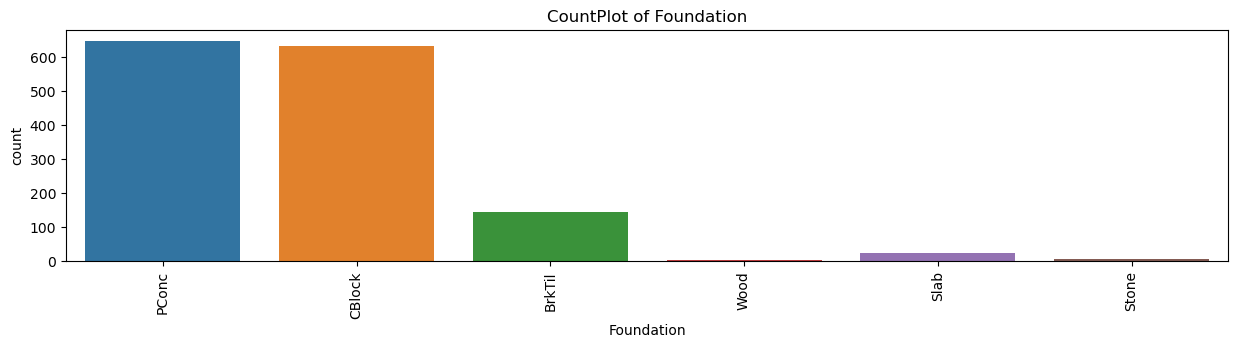

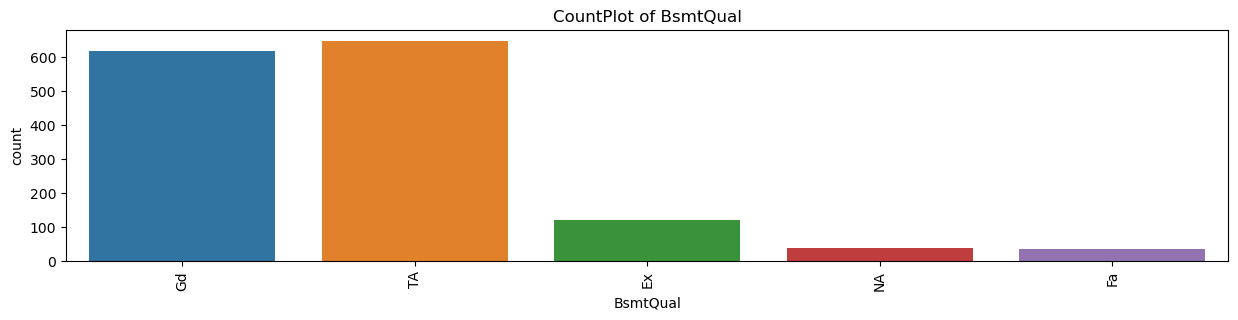

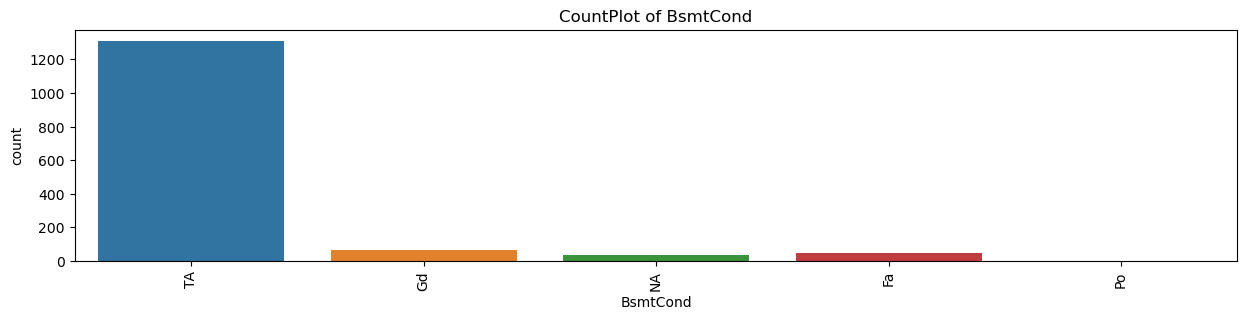

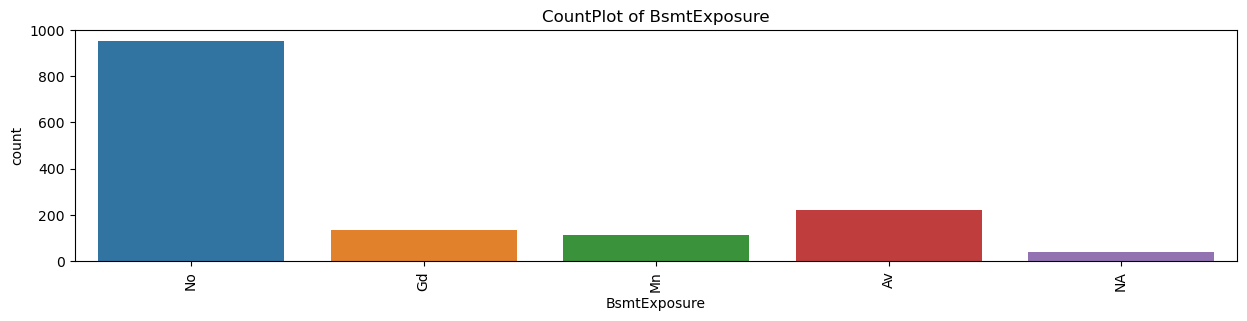

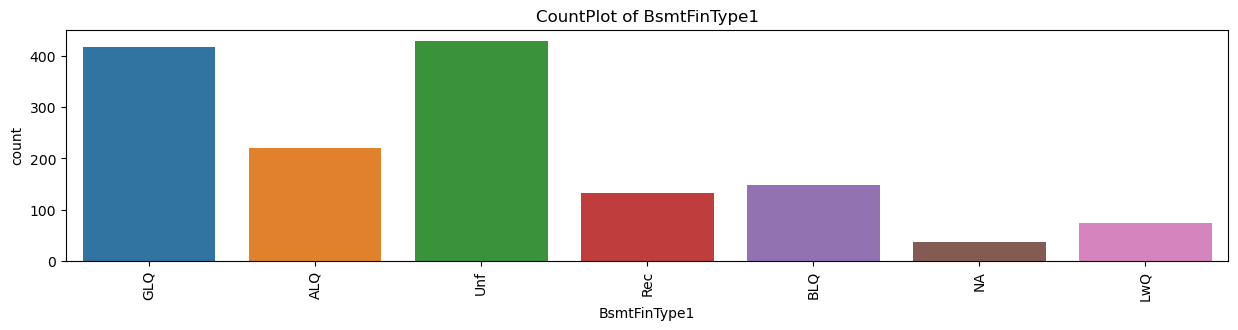

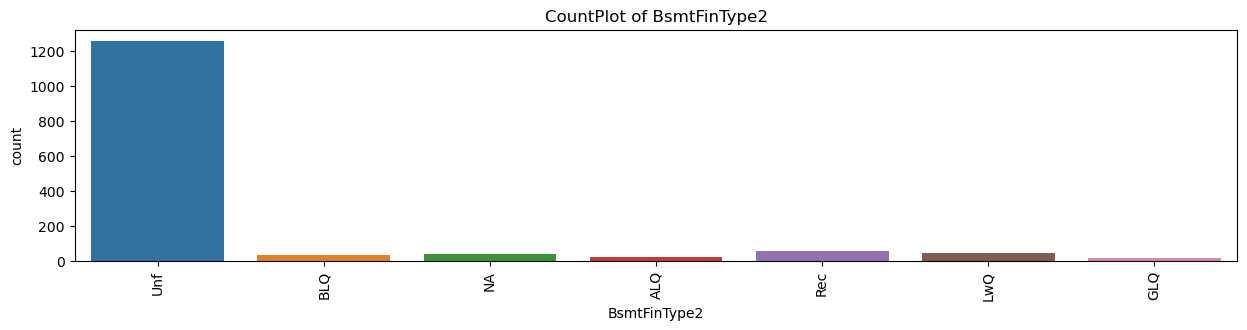

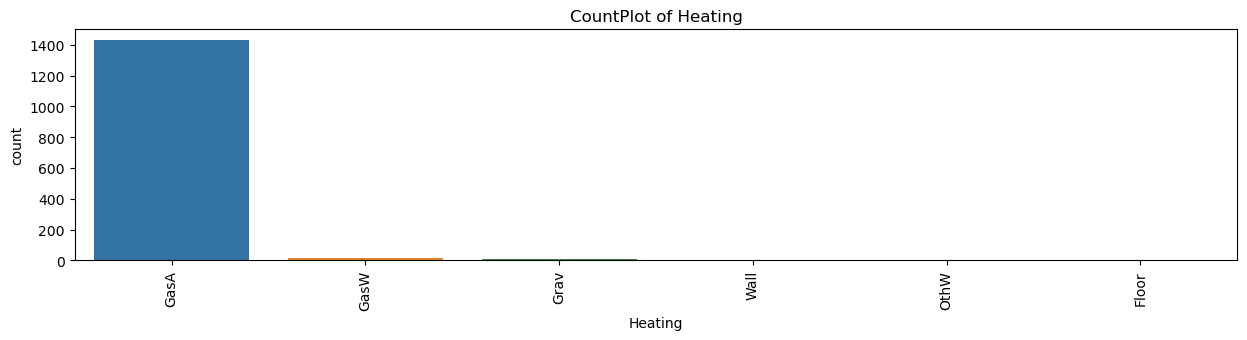

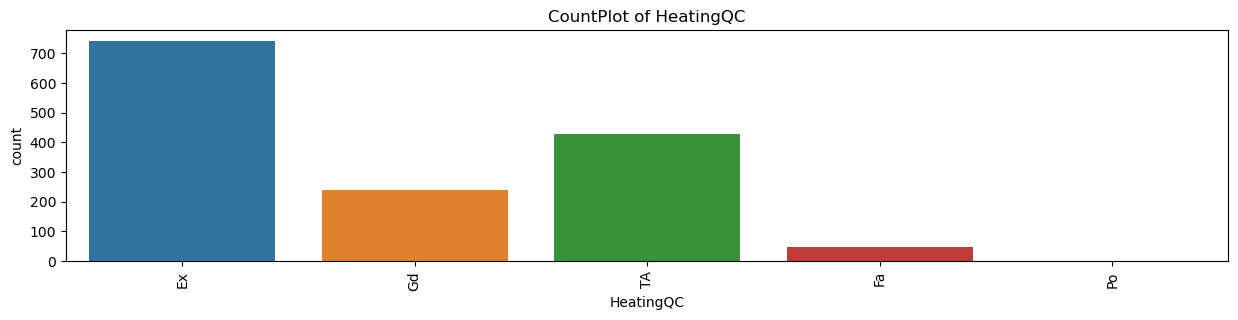

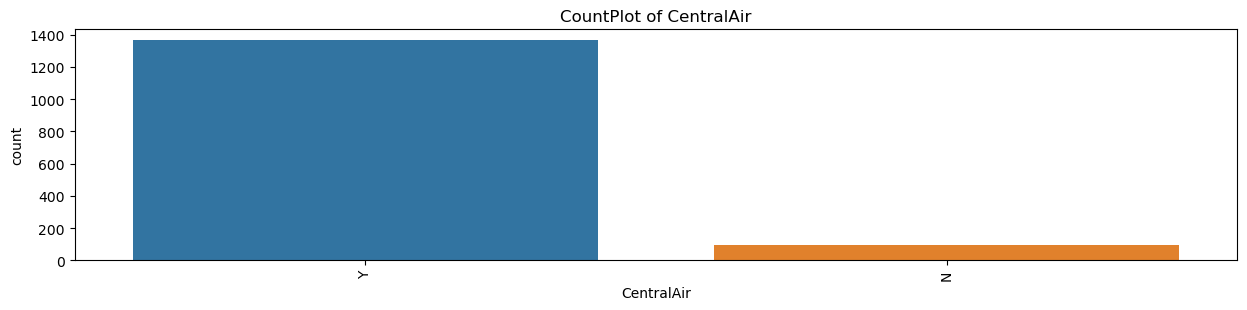

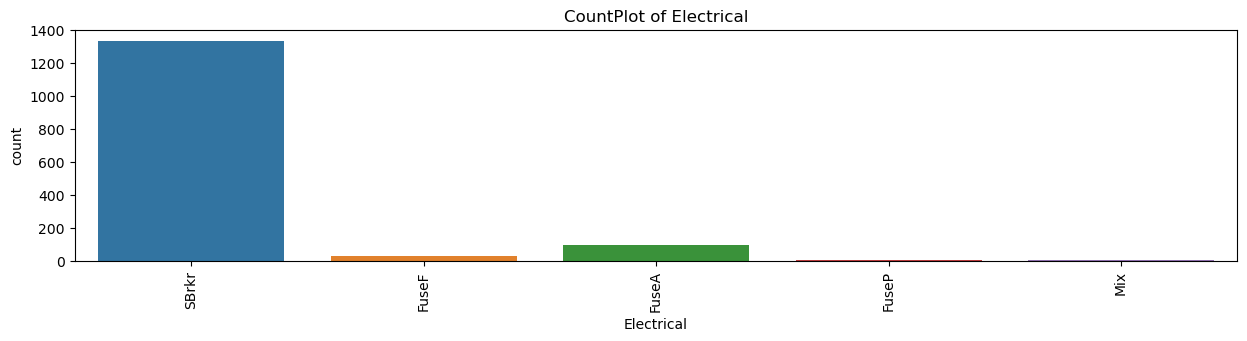

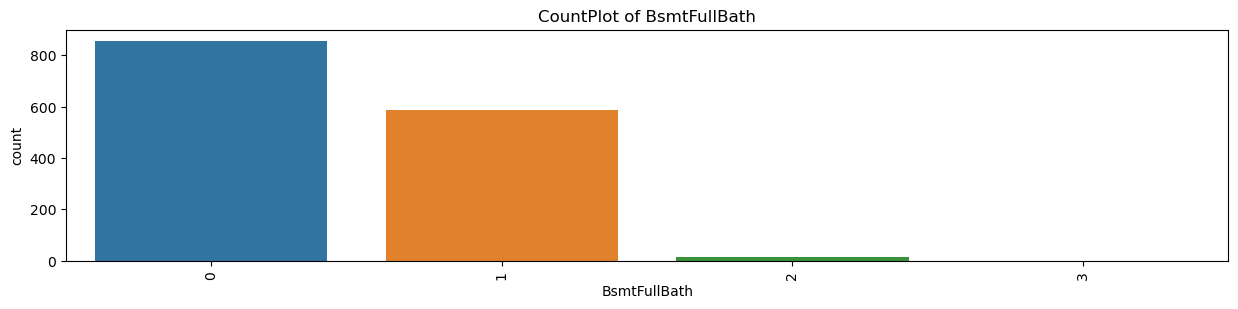

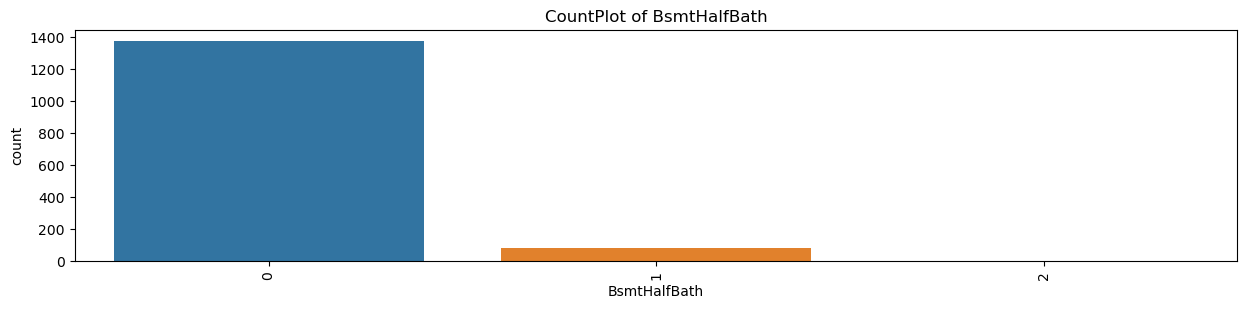

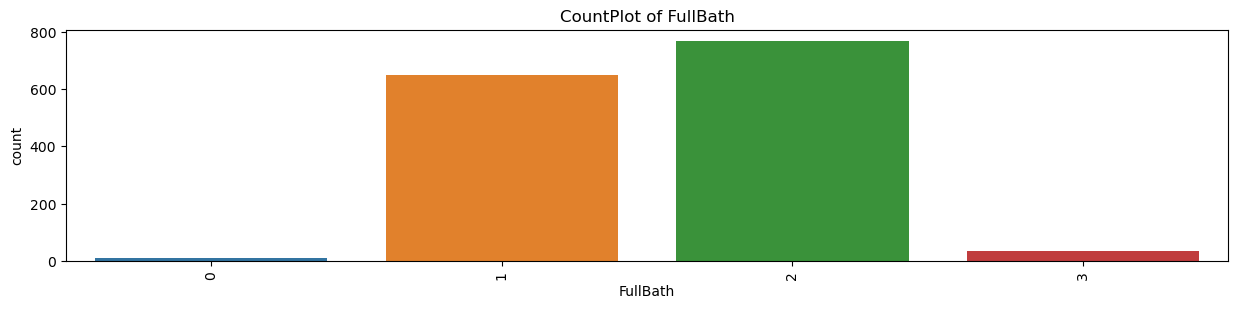

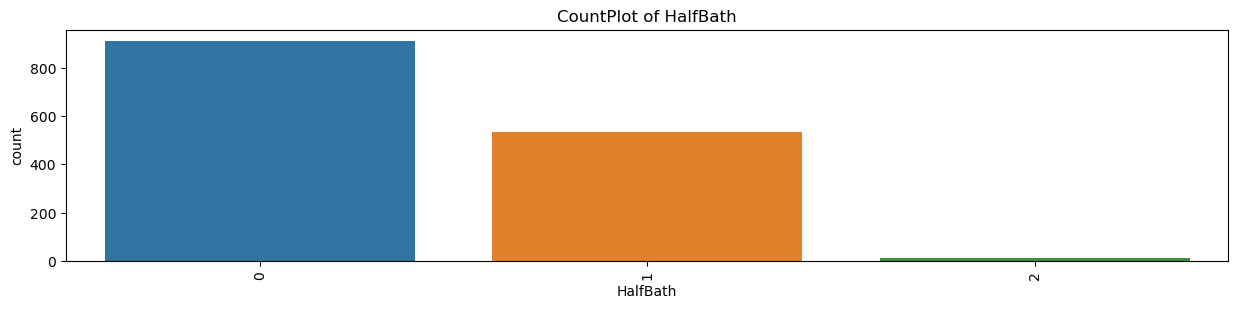

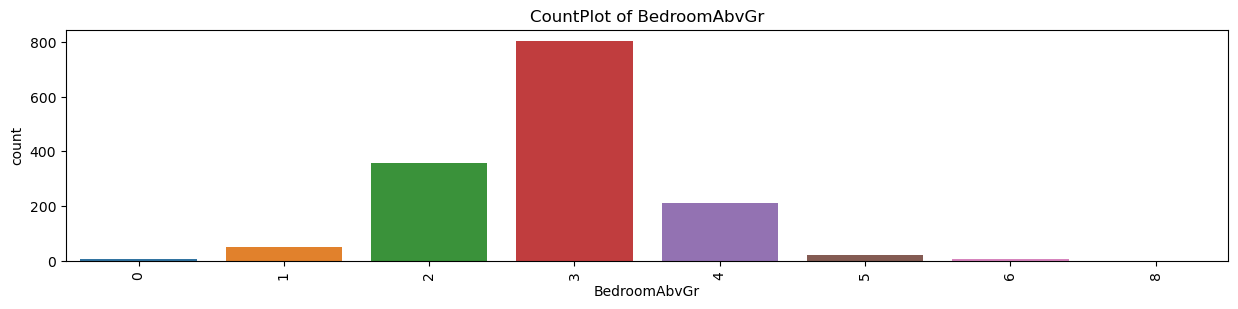

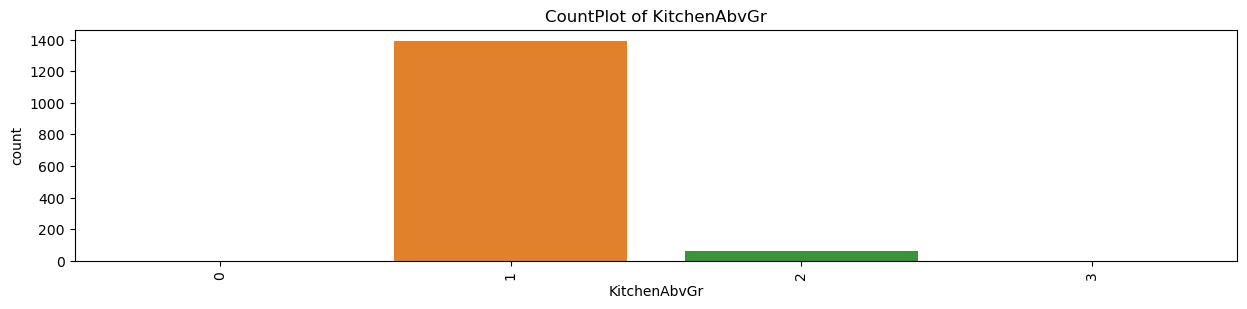

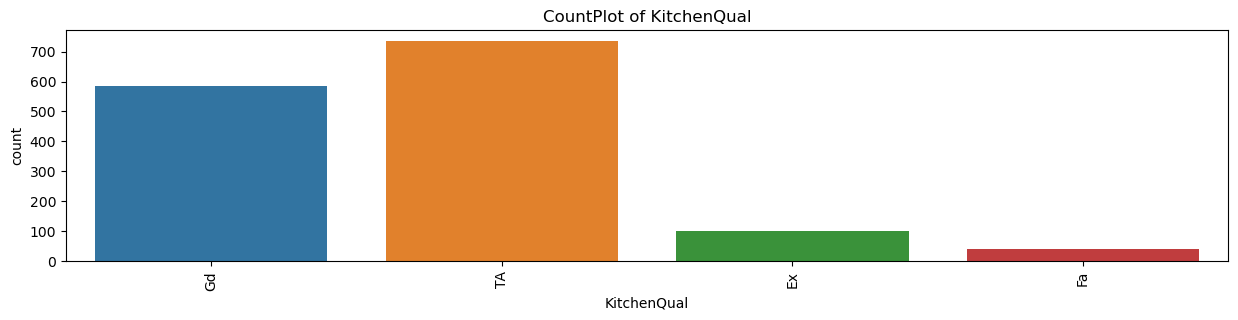

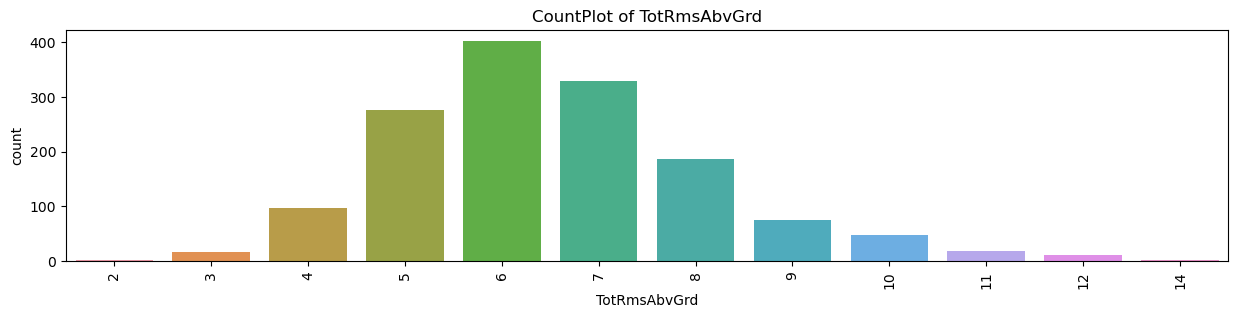

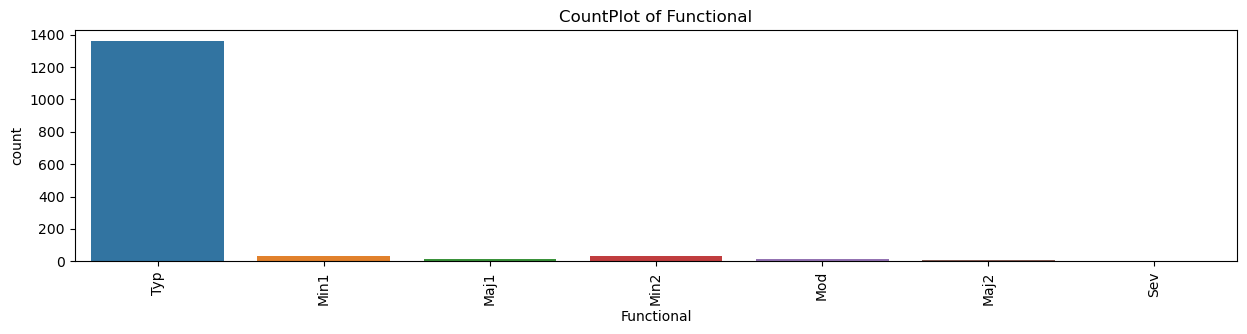

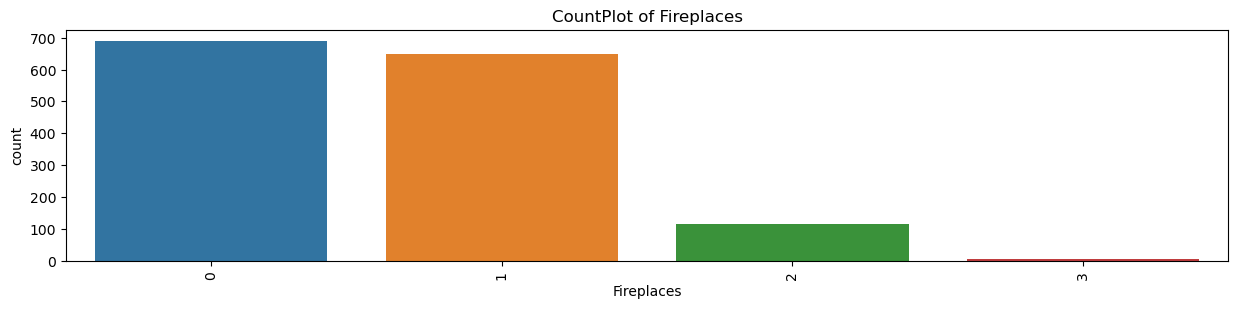

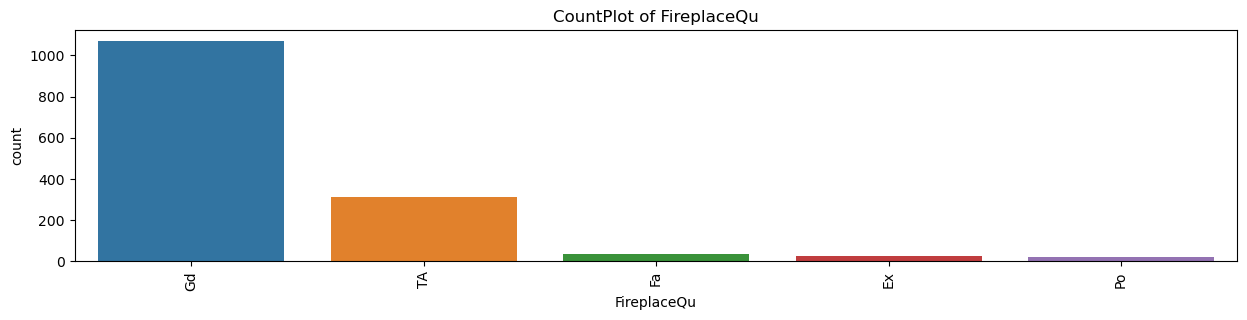

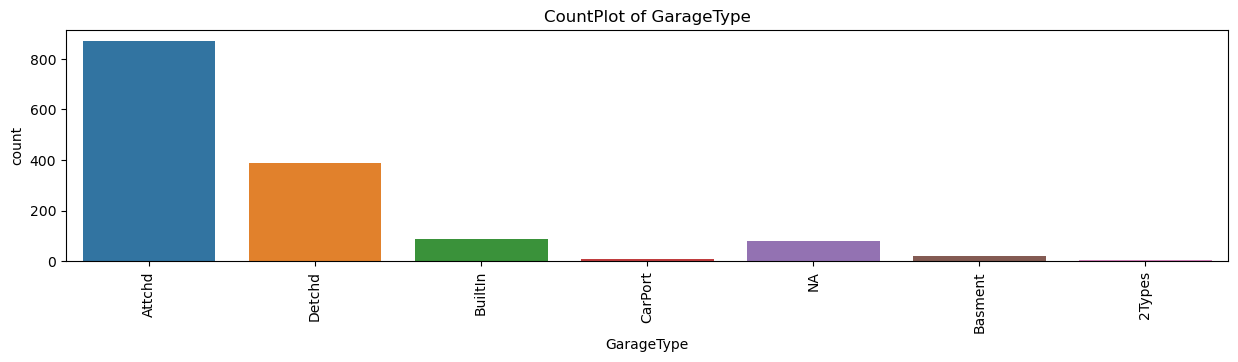

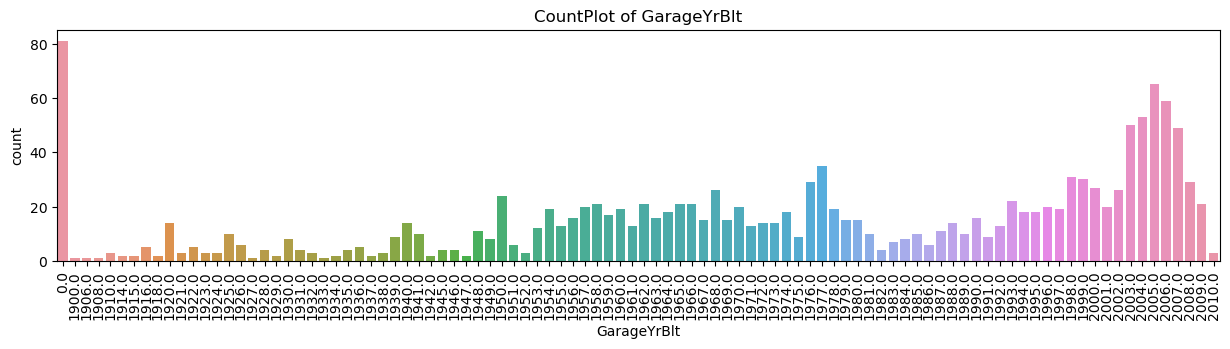

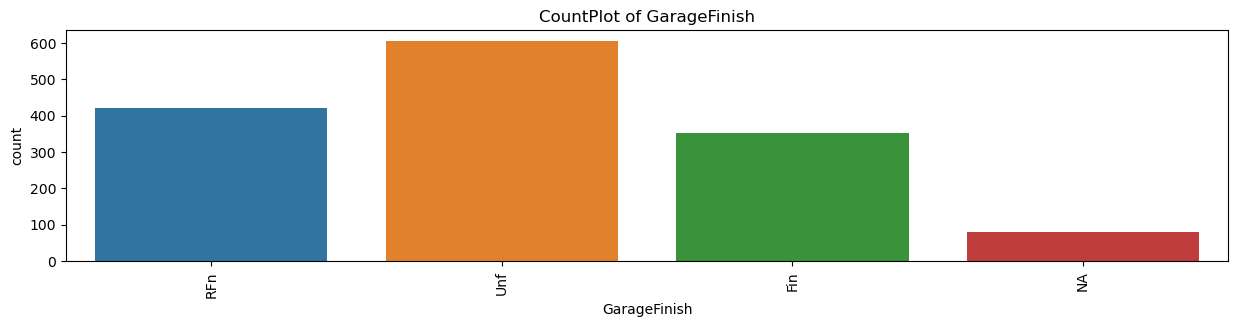

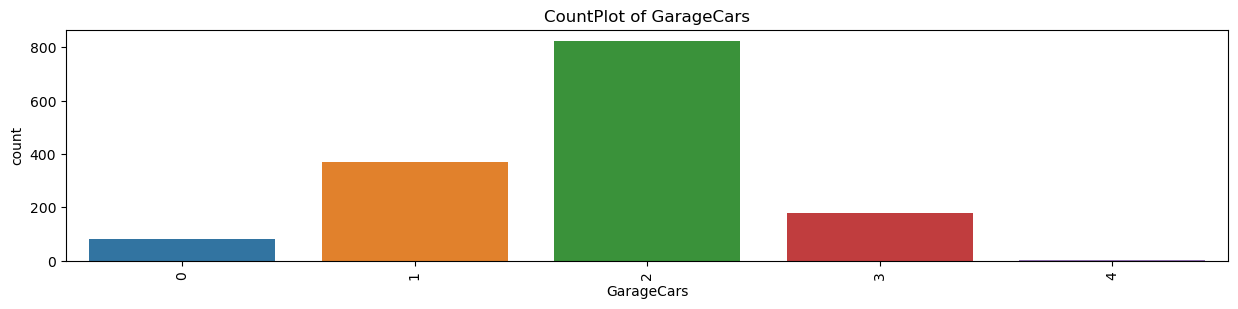

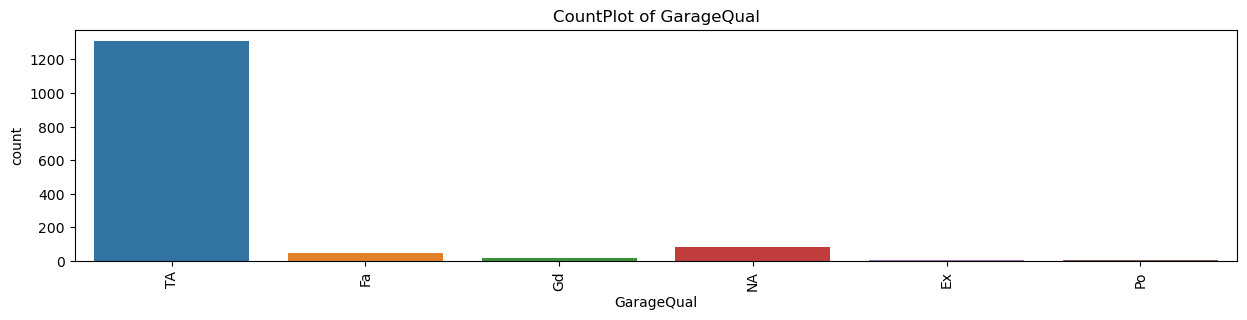

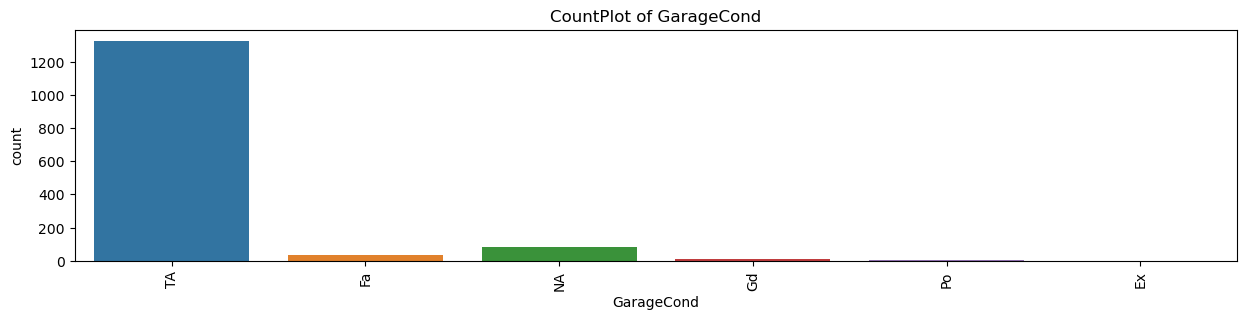

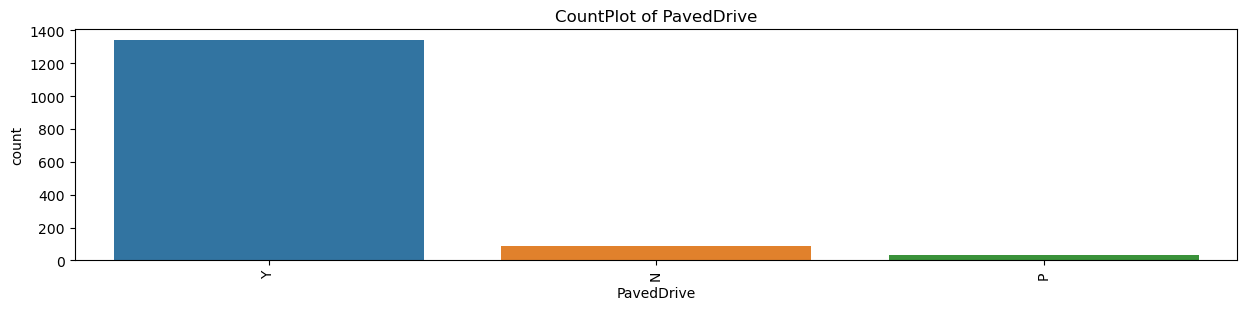

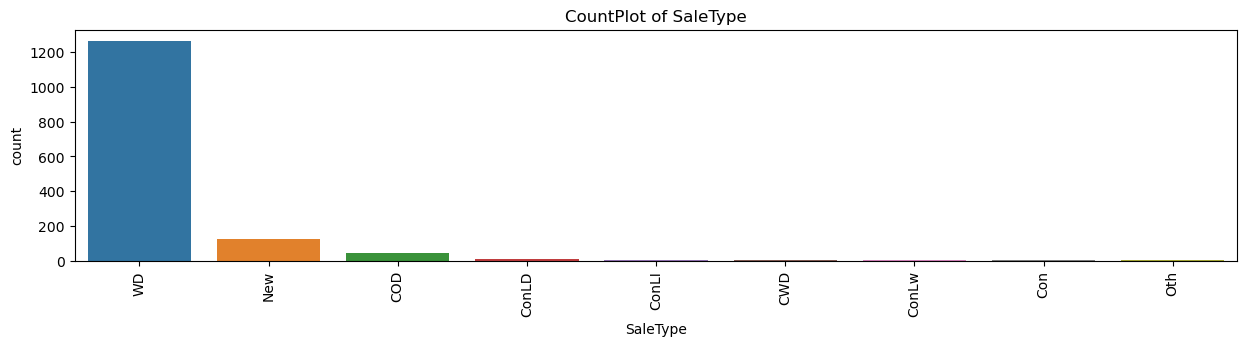

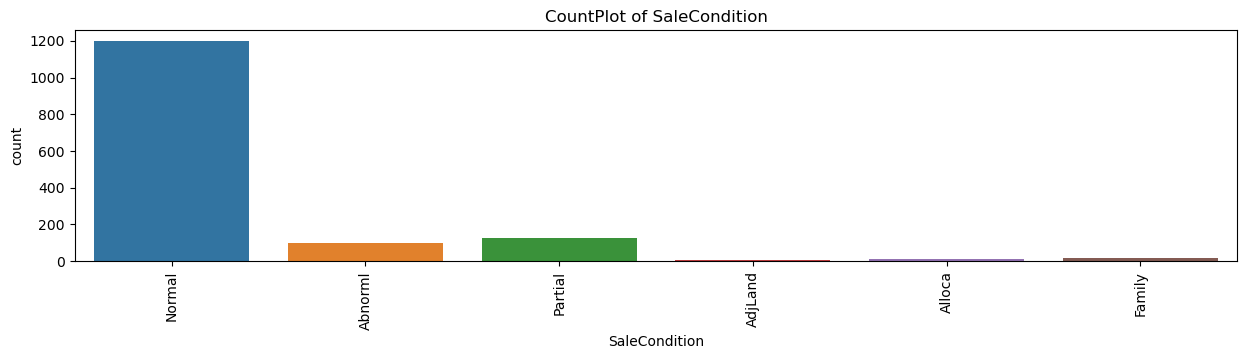

In [584]:
for var in housing_cat.columns:
    plt.figure(figsize = [15,3])
    plt.title("CountPlot of "+ str(var))
    plt.xticks(rotation=90)
    sns.countplot(x=housing[var])

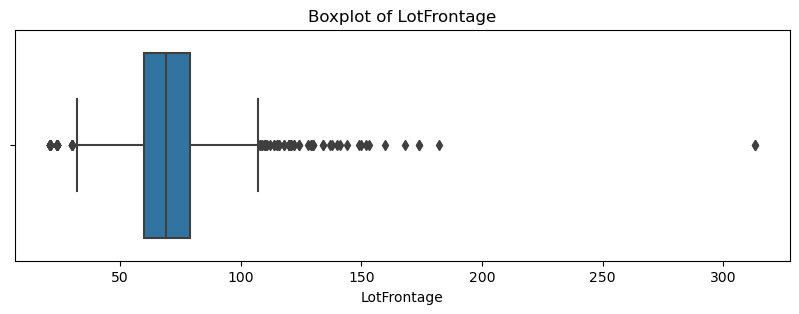

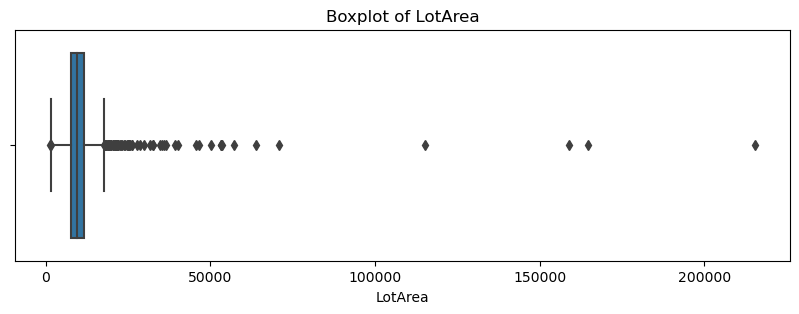

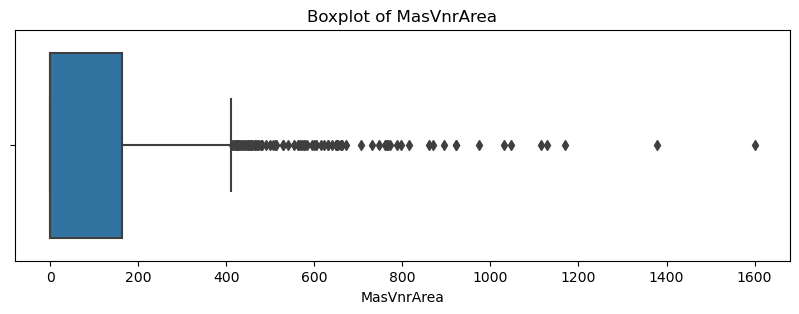

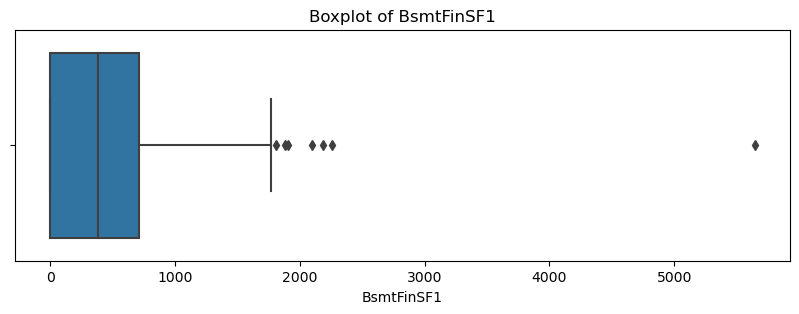

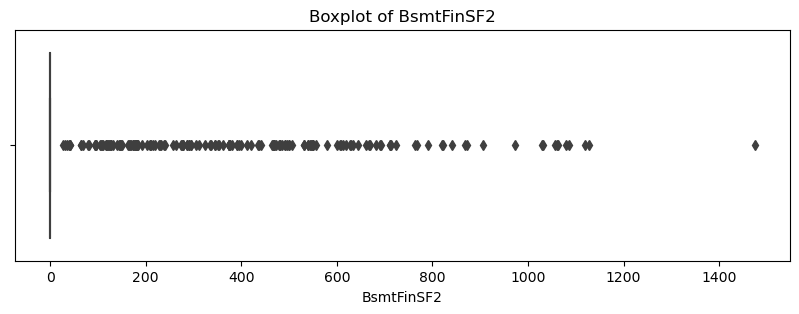

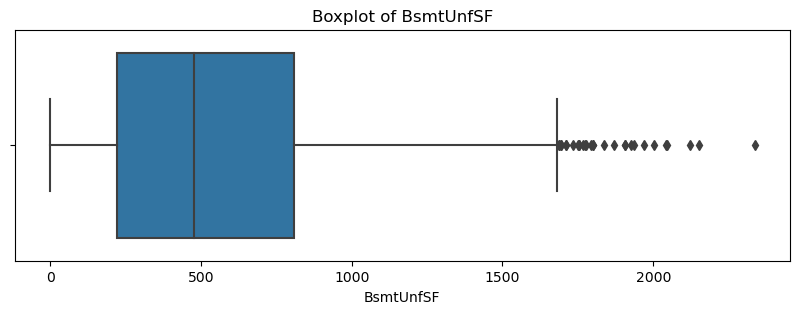

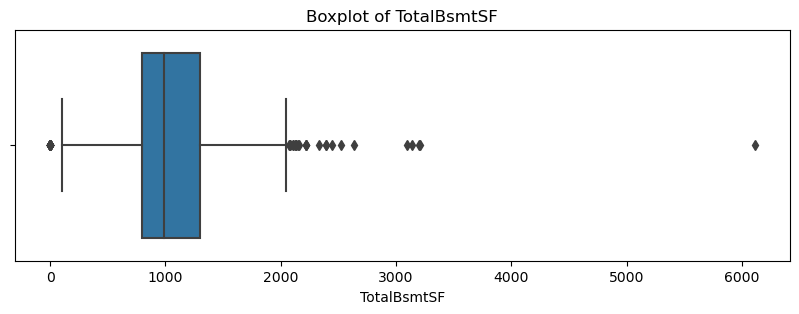

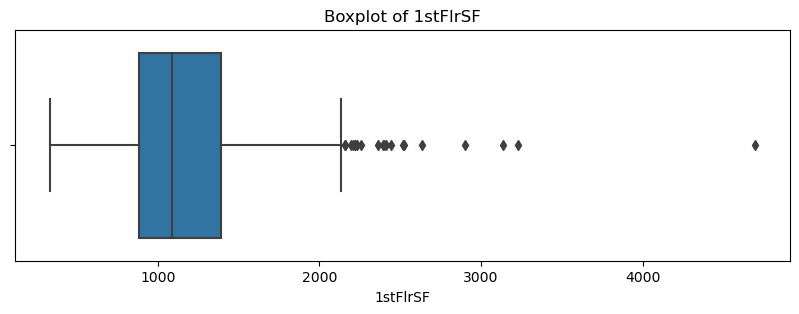

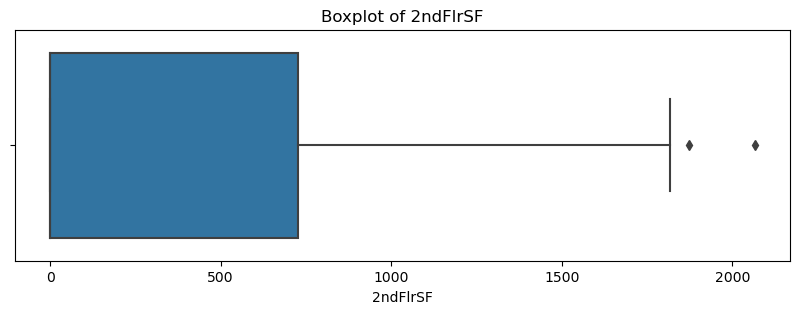

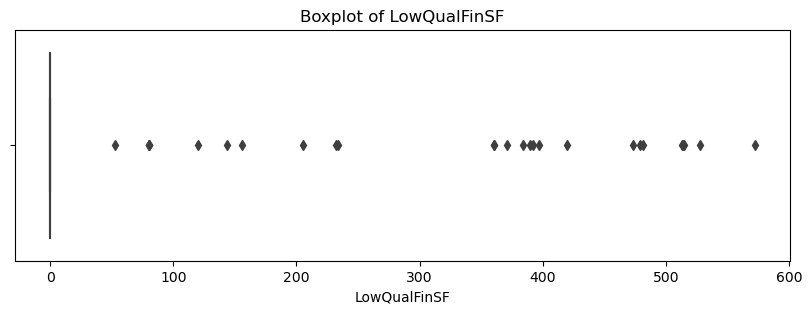

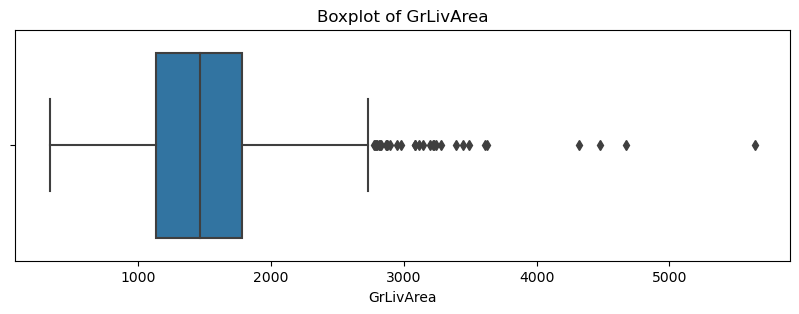

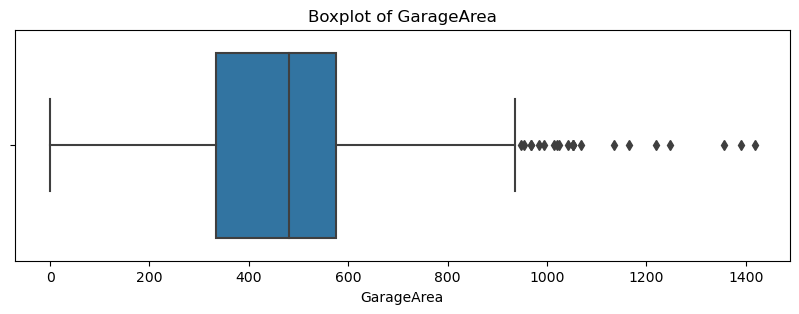

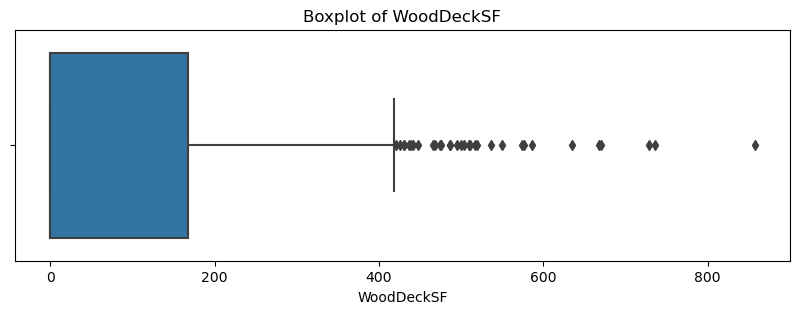

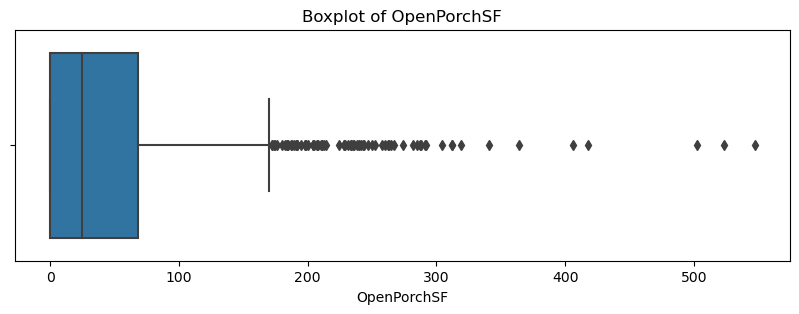

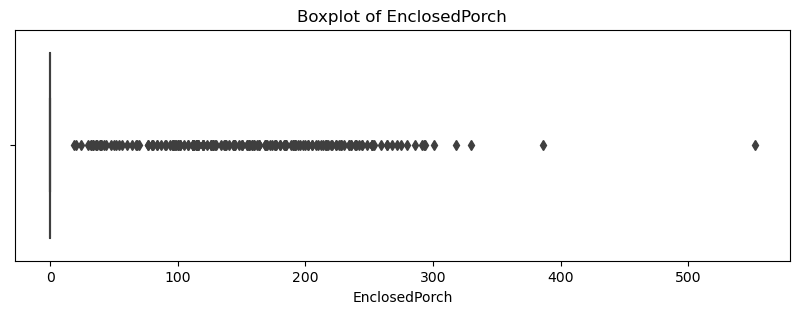

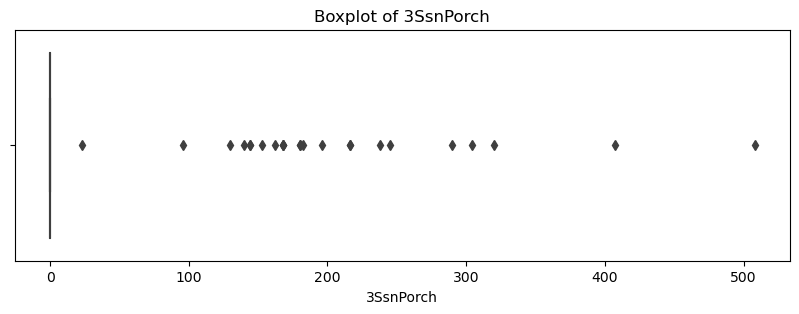

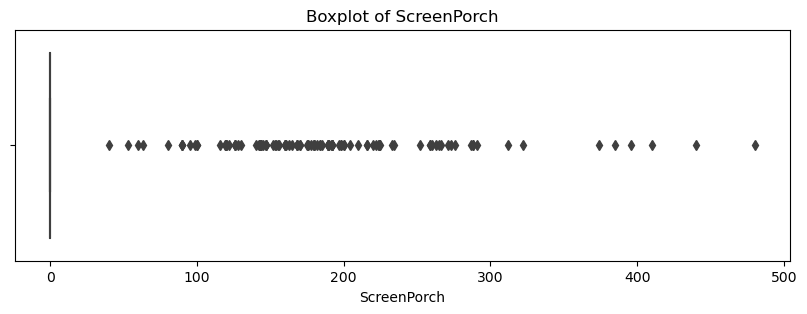

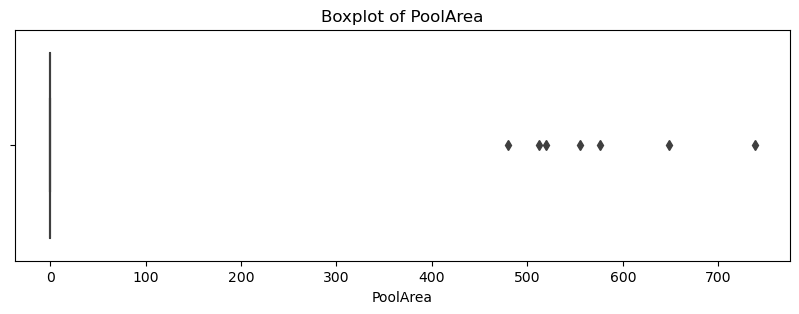

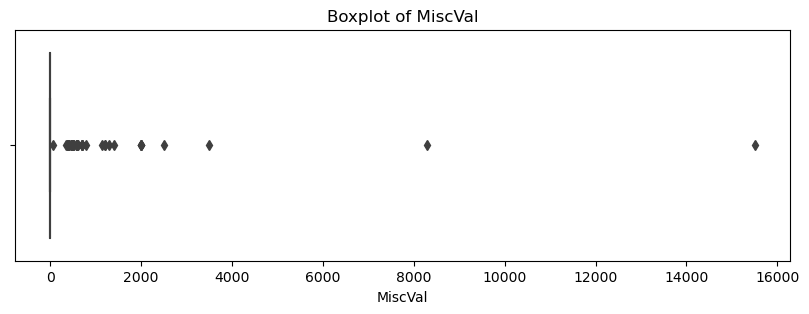

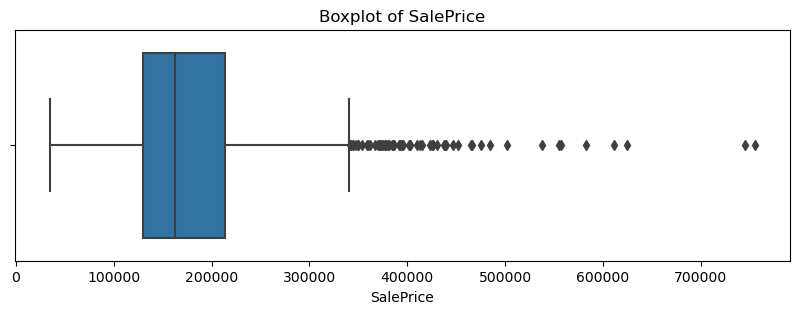

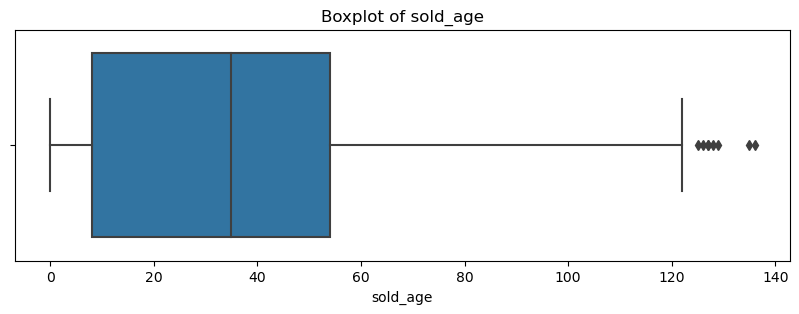

In [24]:
for var in housing_num.columns:
    plt.figure(figsize = [10,3])
    plt.title("Boxplot of "+ str(var))
#     plt.xticks(rotation=90)
    sns.boxplot(x=housing[var])

In [25]:
housing.shape

(1460, 72)

#### Numerical vs target variable(sales price)

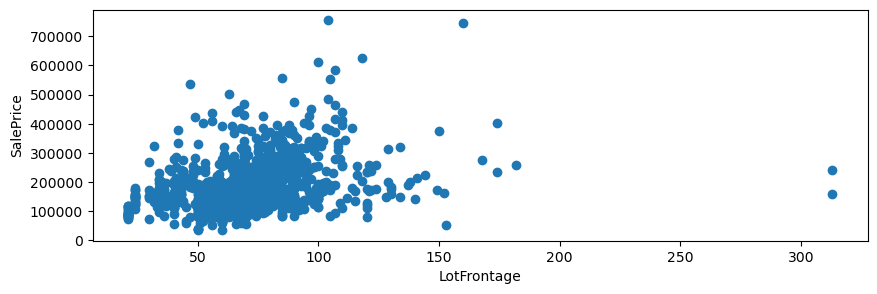

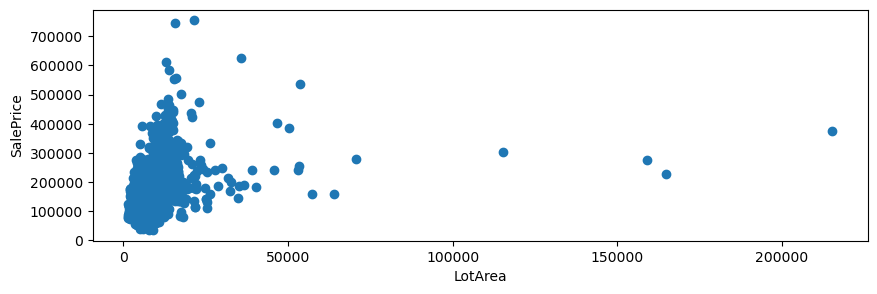

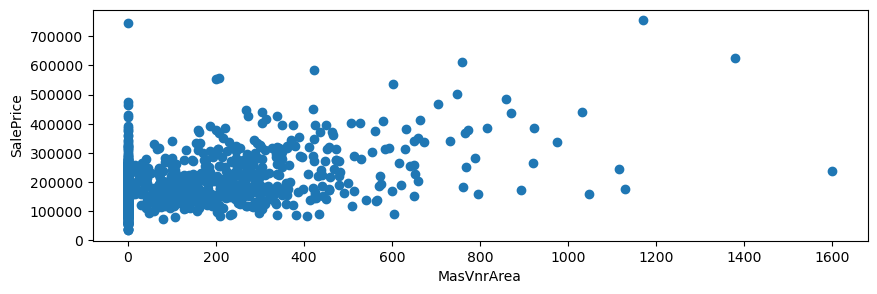

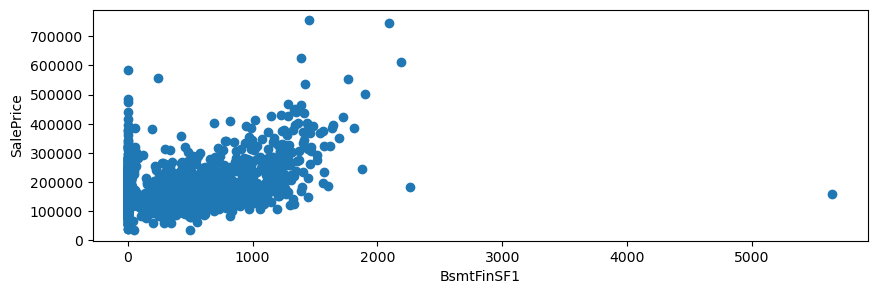

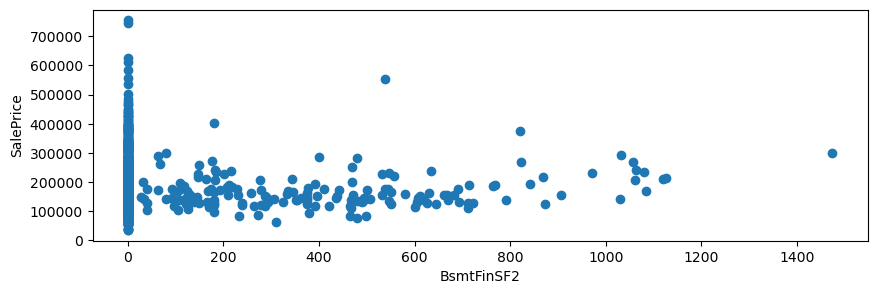

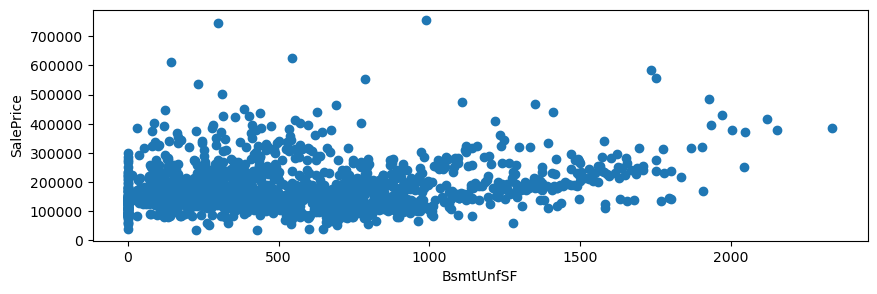

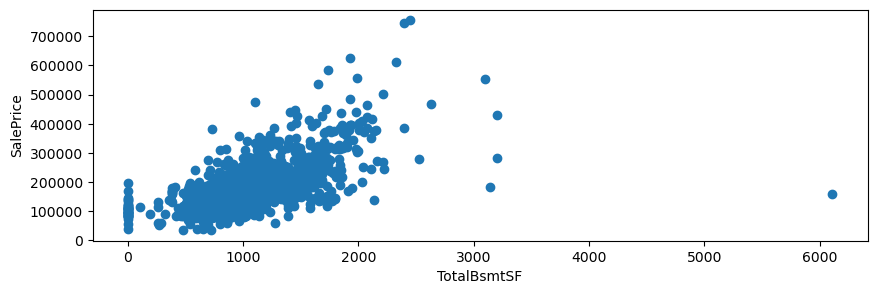

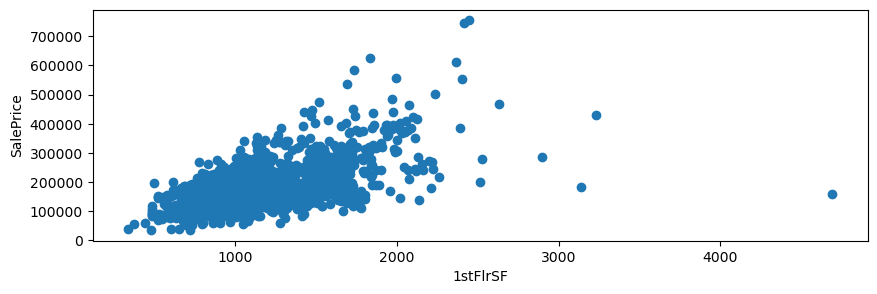

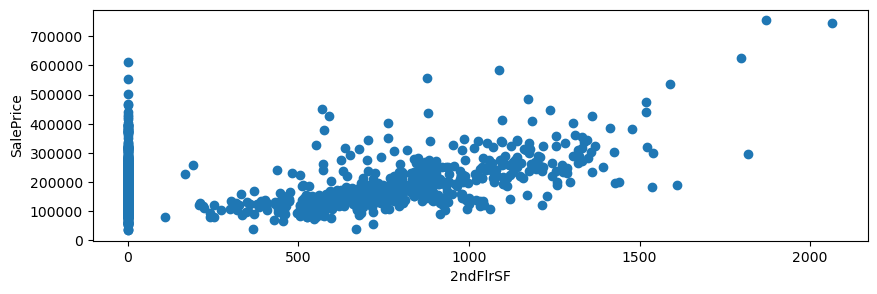

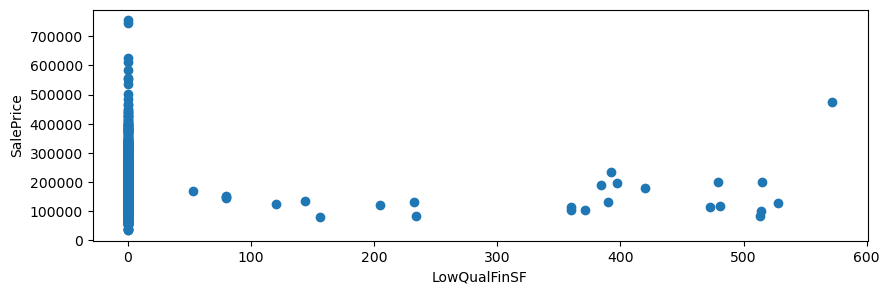

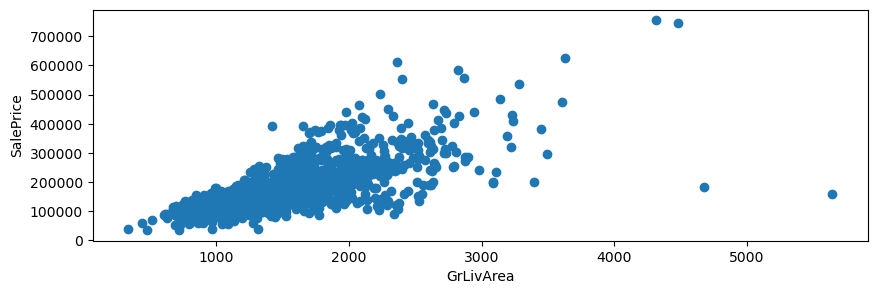

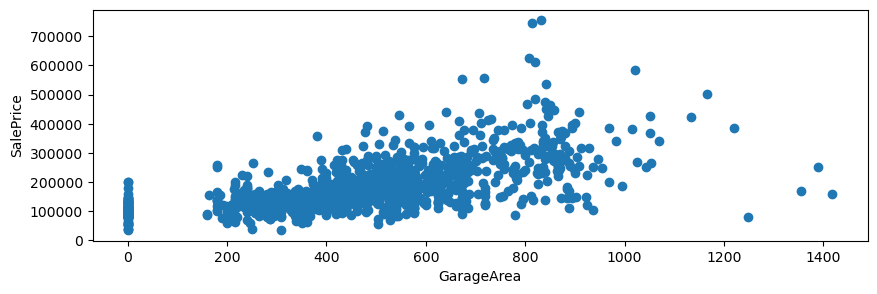

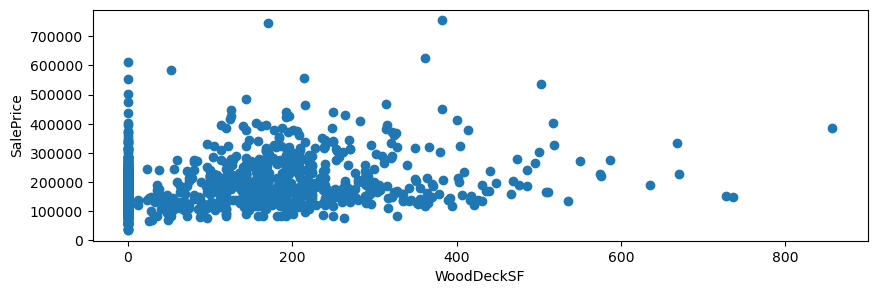

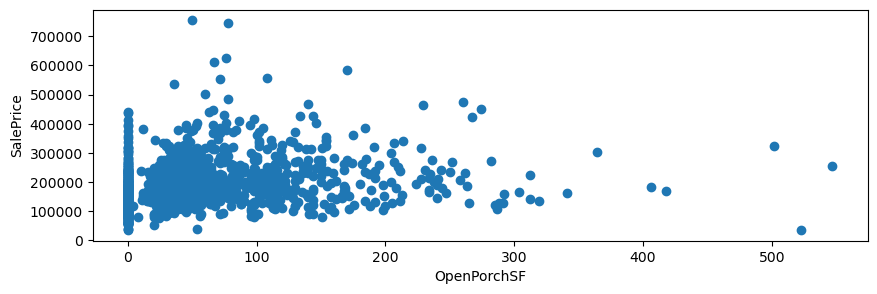

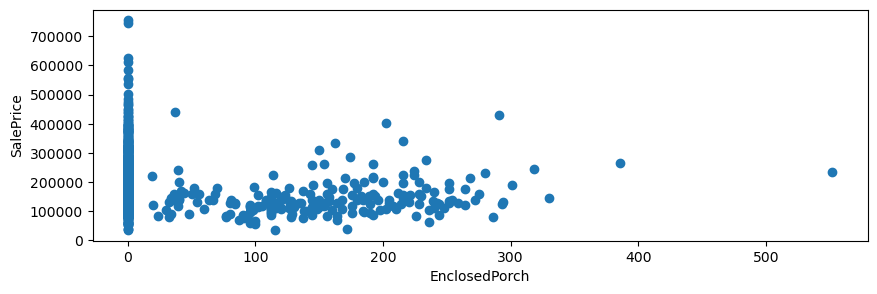

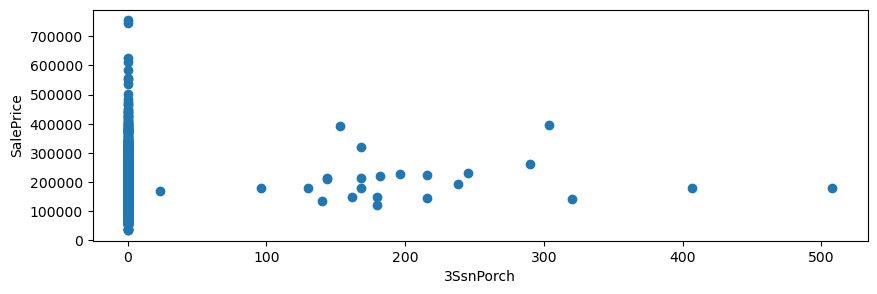

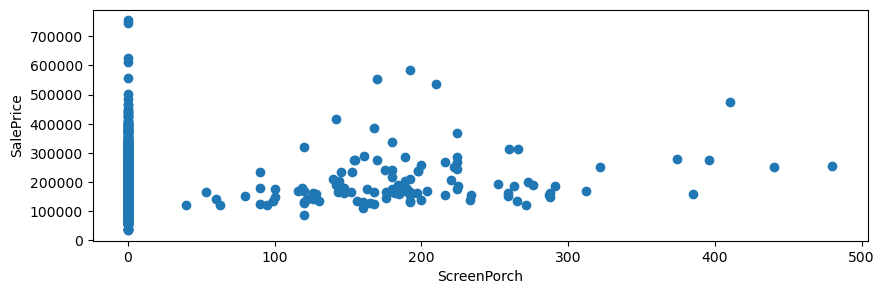

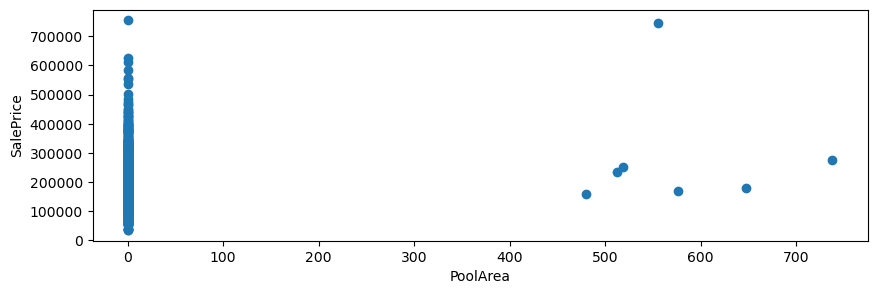

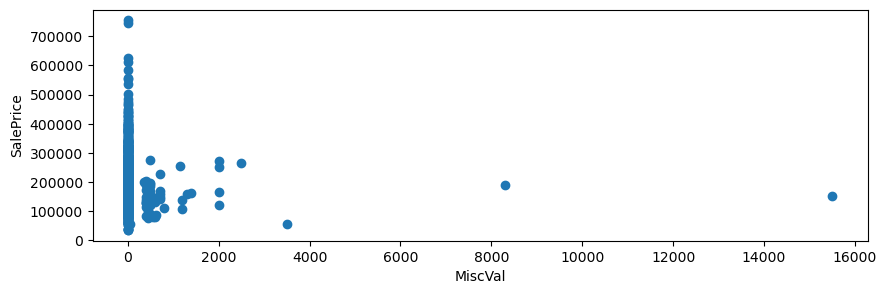

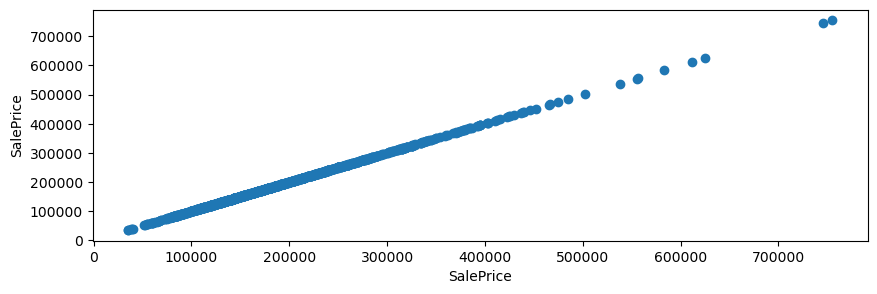

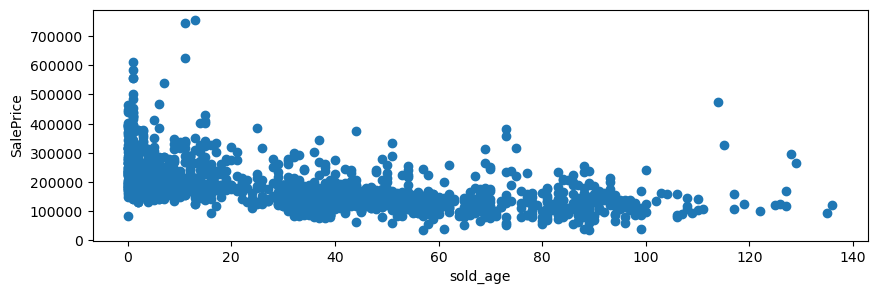

In [26]:
for var in housing_num.columns:
    plt.figure(figsize=[10,3])
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.scatter(housing[var], housing['SalePrice'])

### Categorical vs SalesPrice

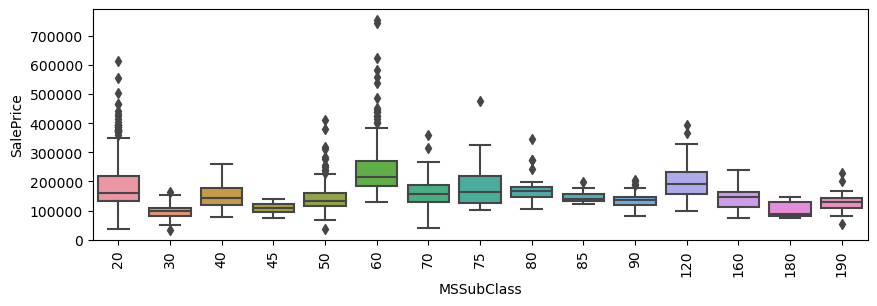

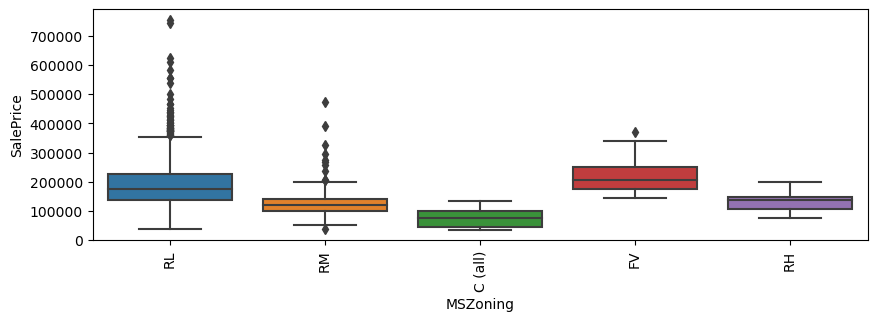

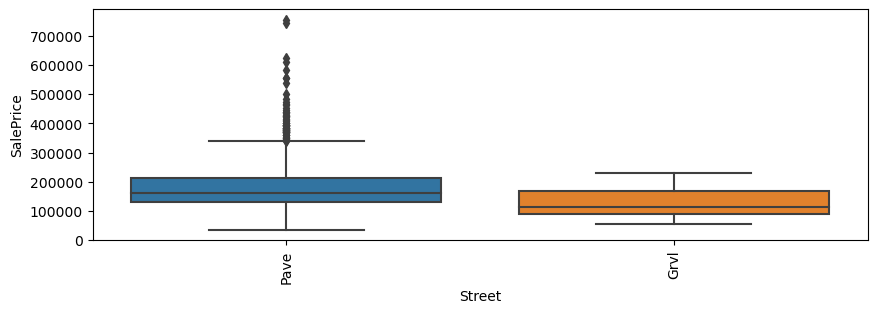

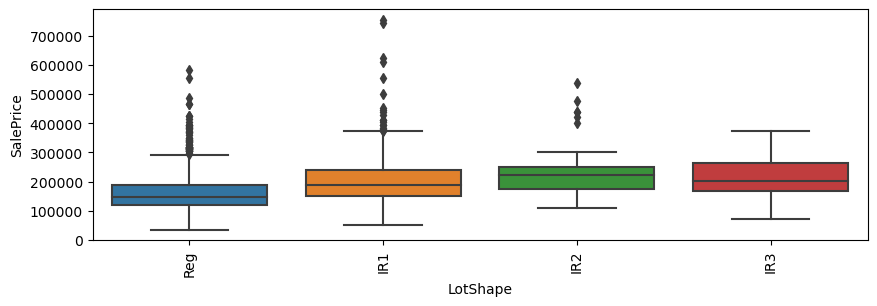

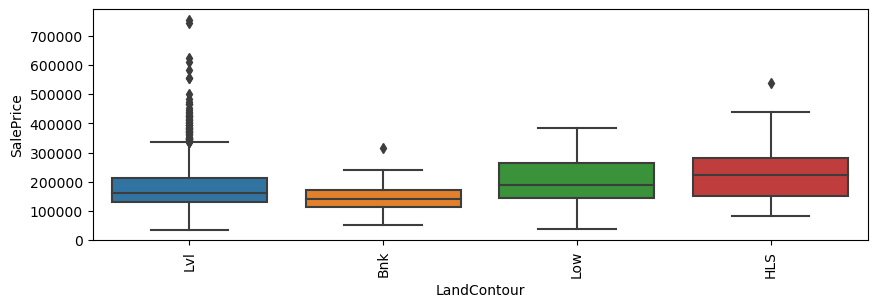

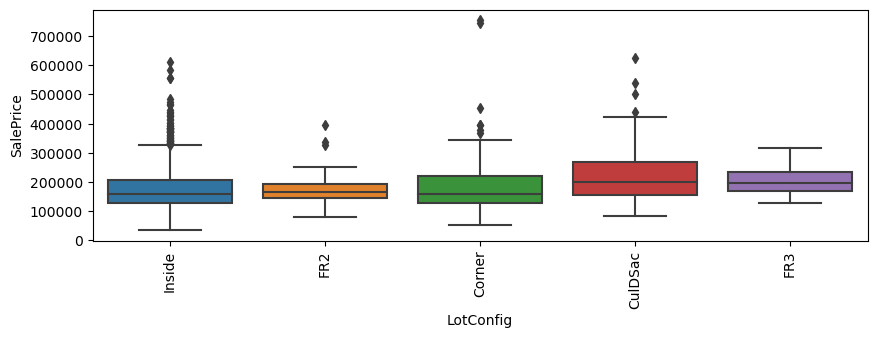

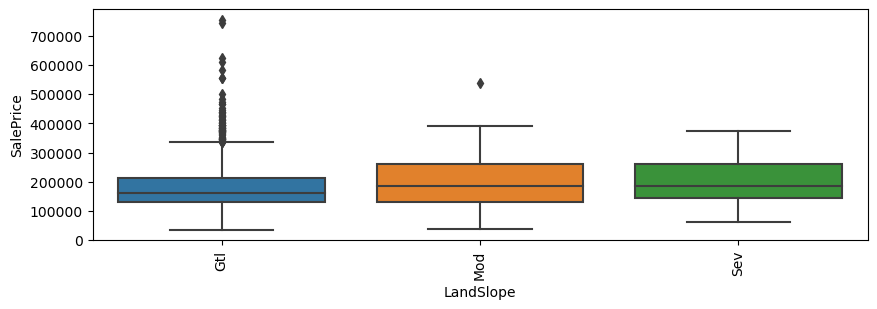

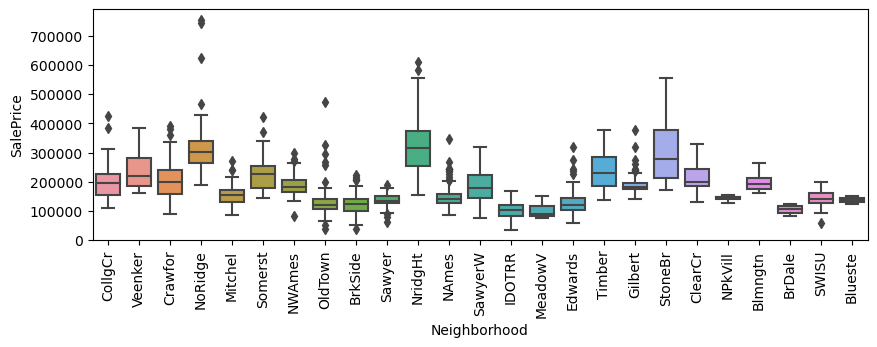

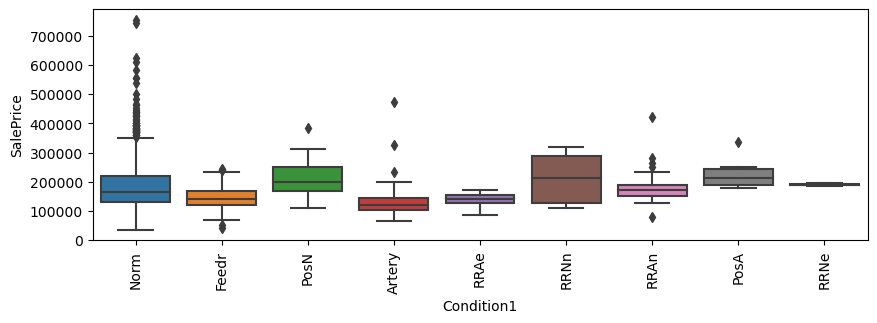

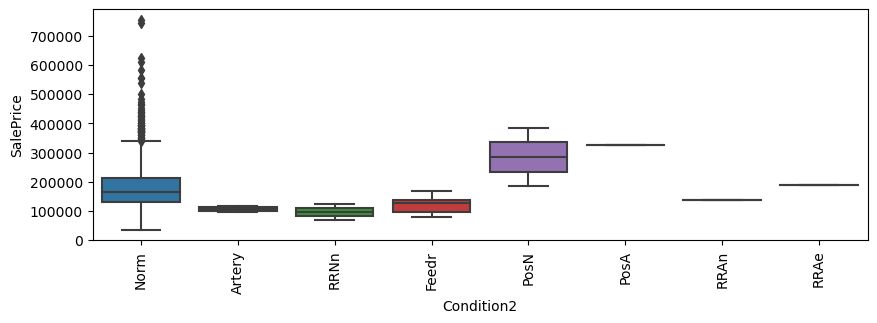

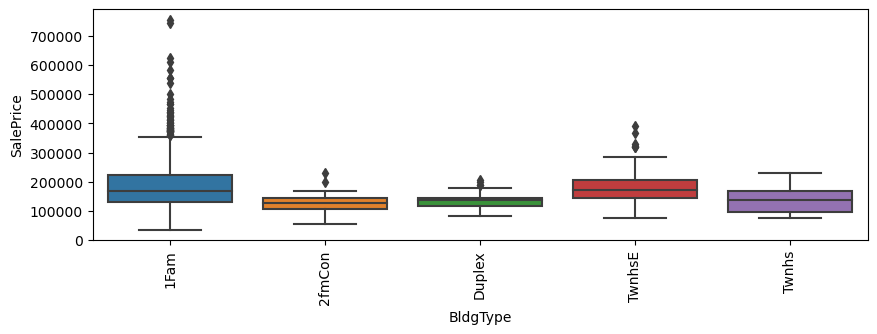

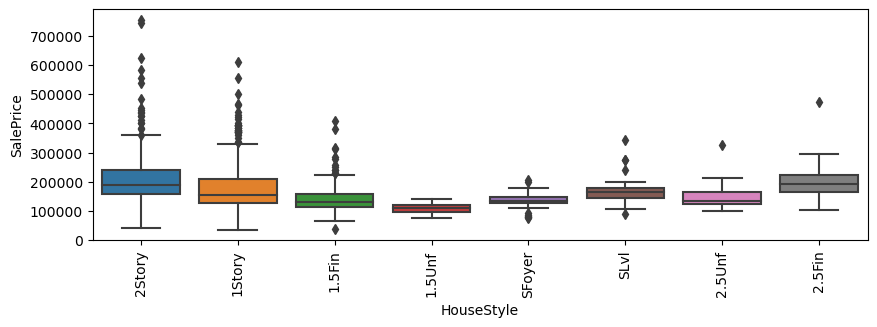

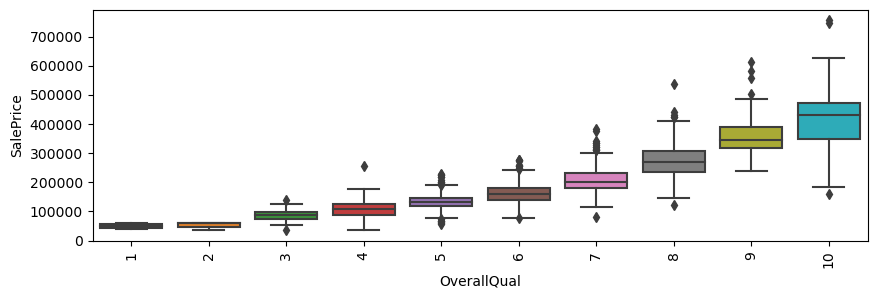

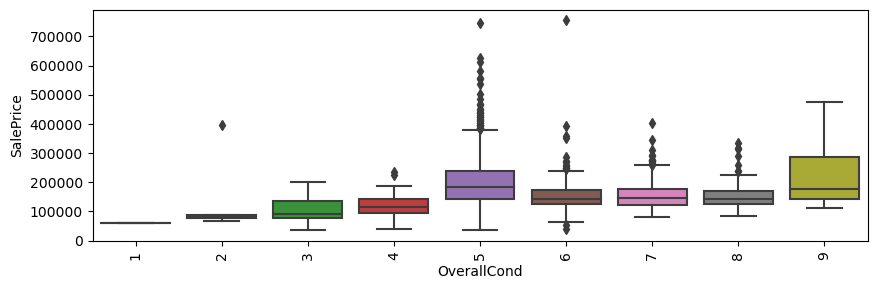

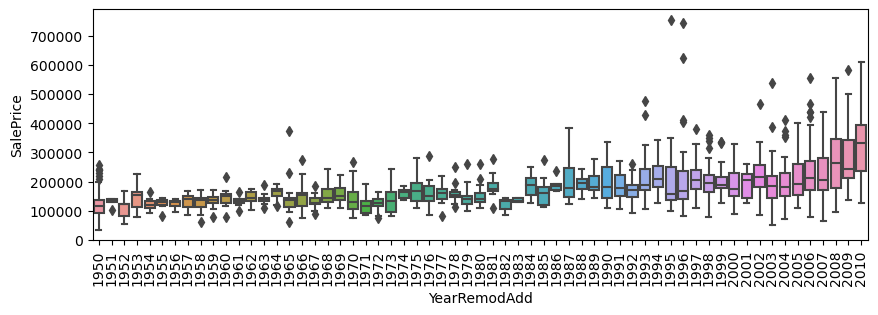

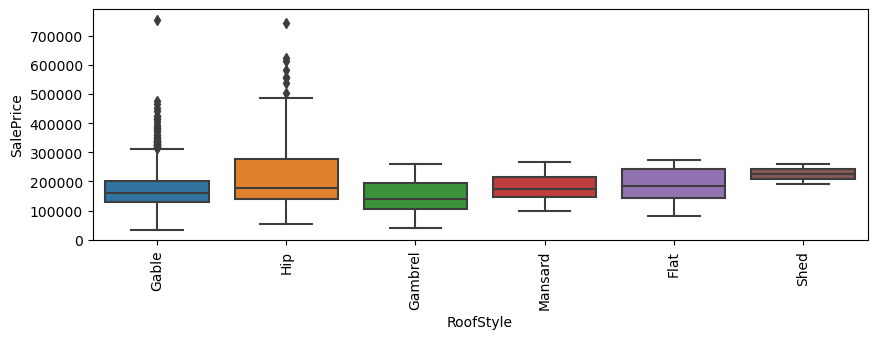

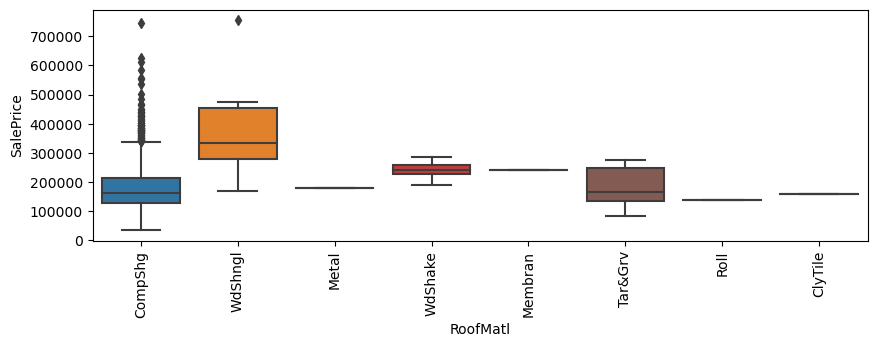

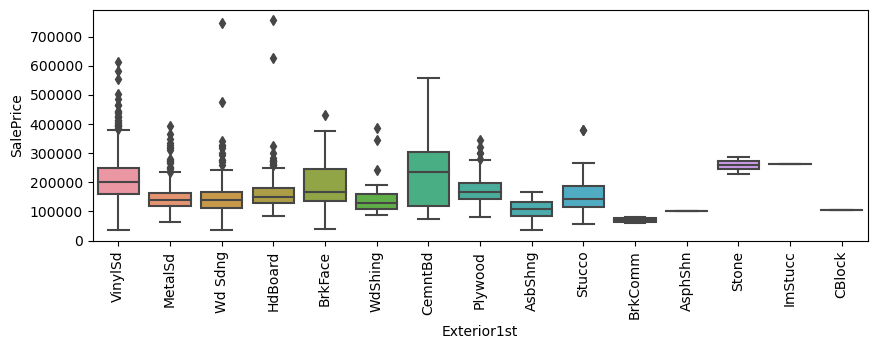

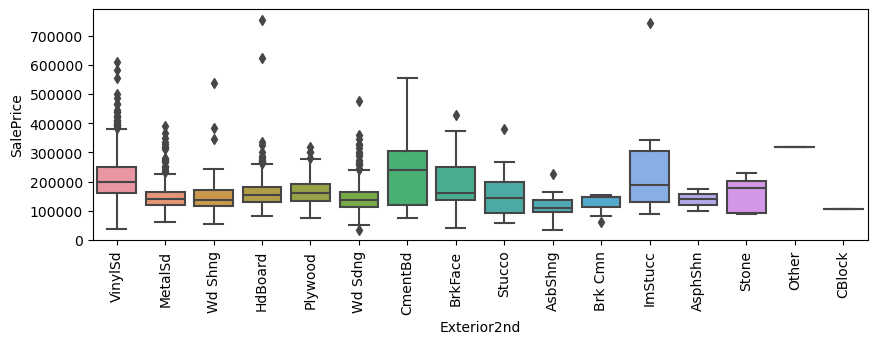

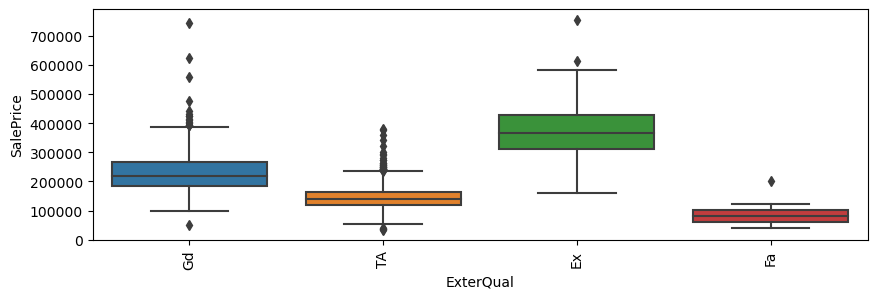

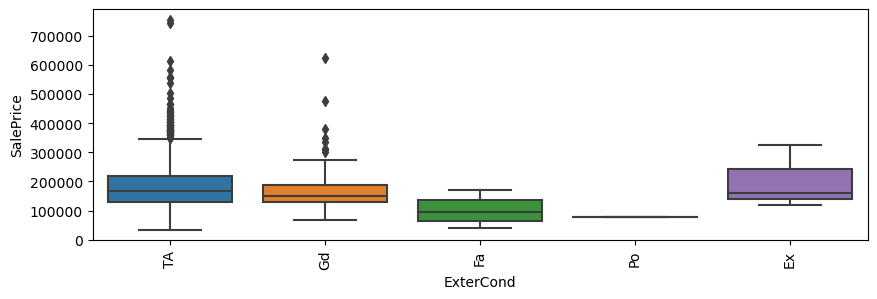

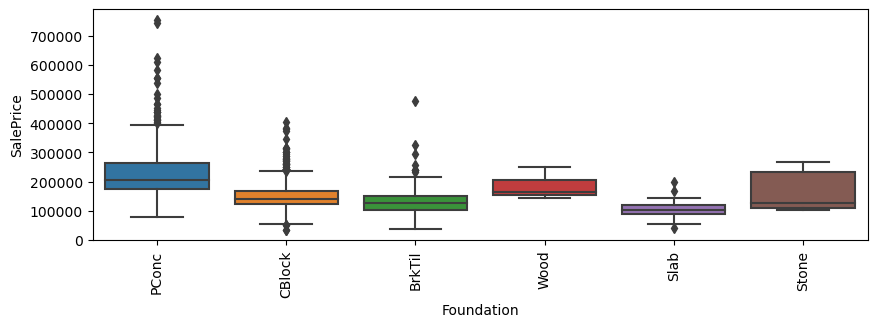

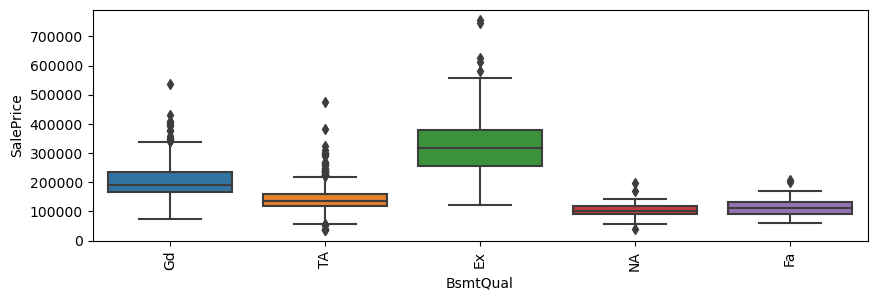

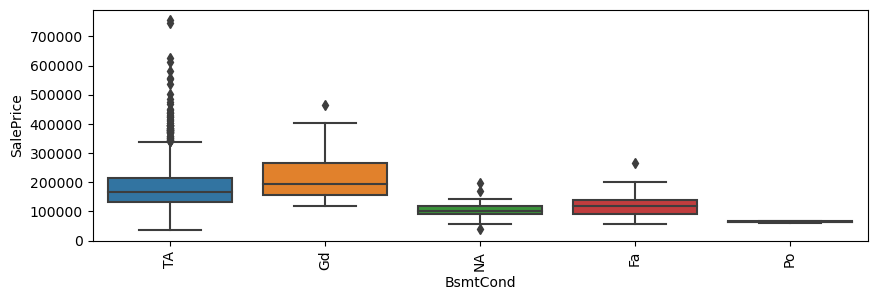

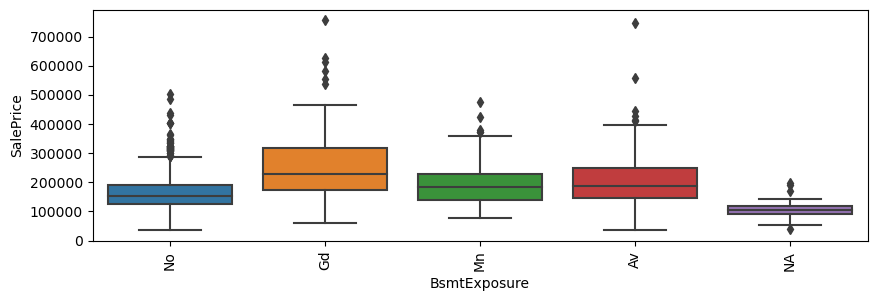

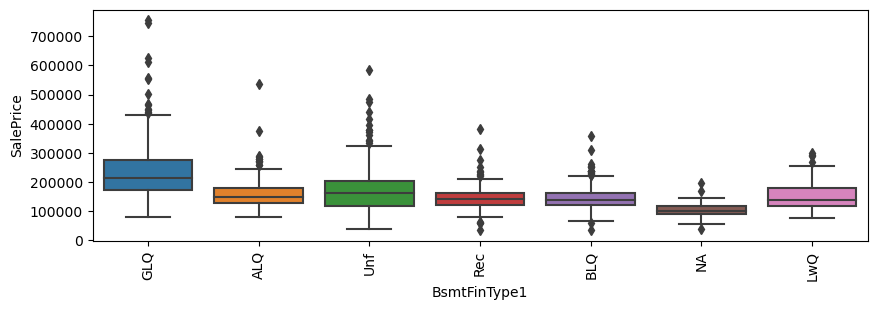

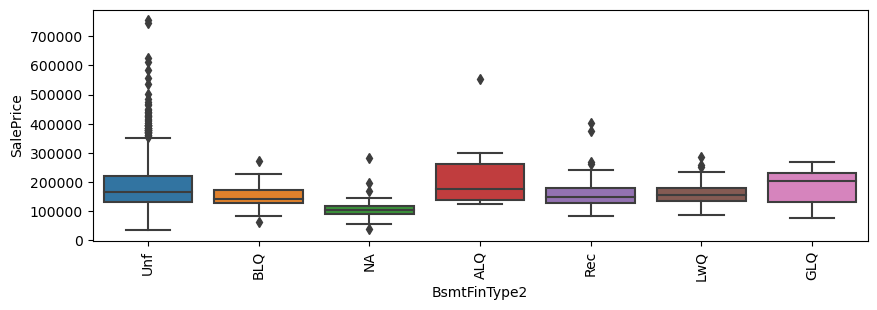

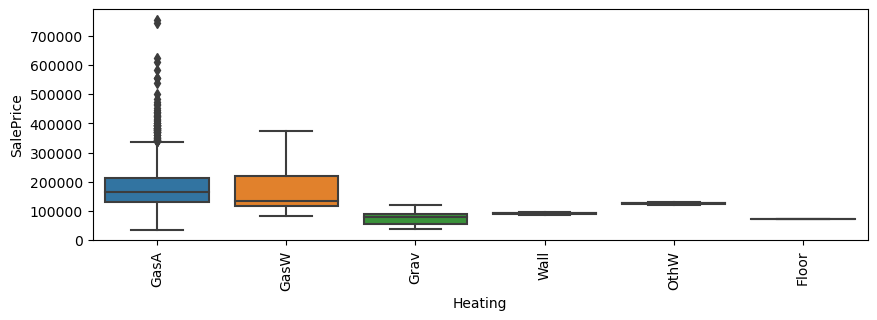

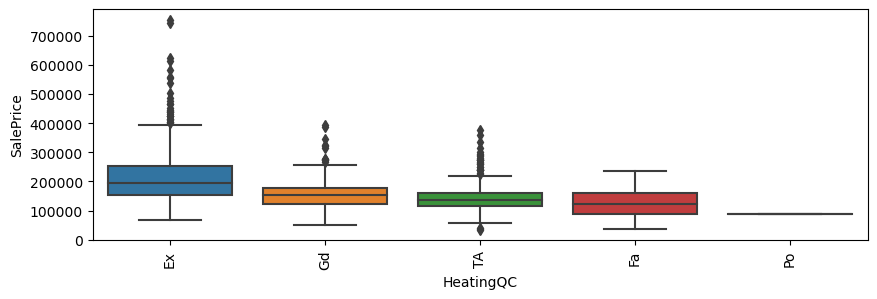

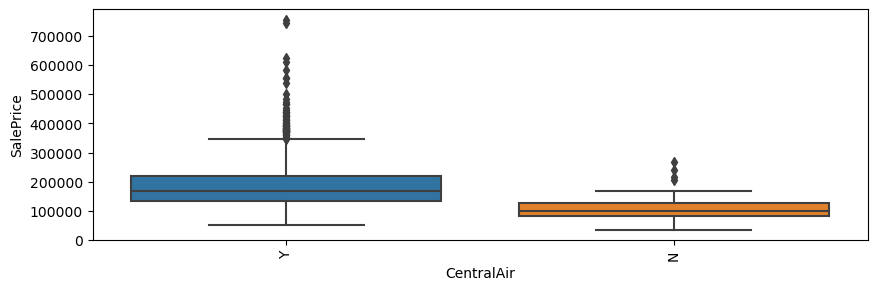

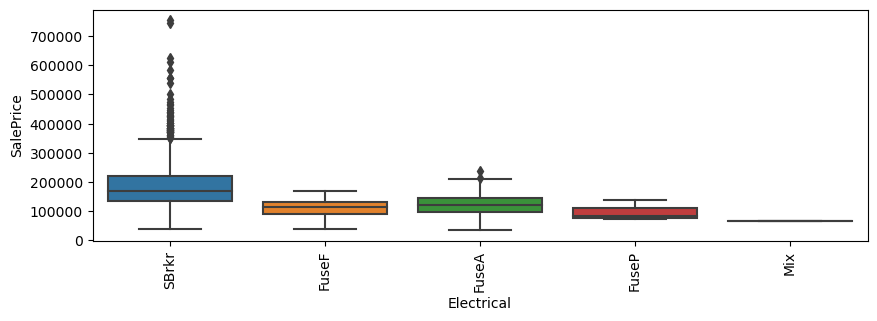

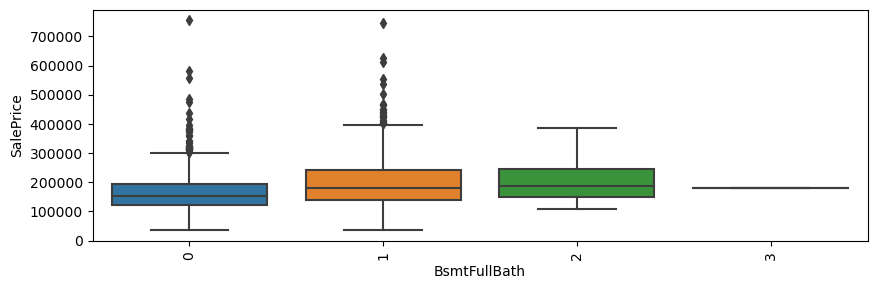

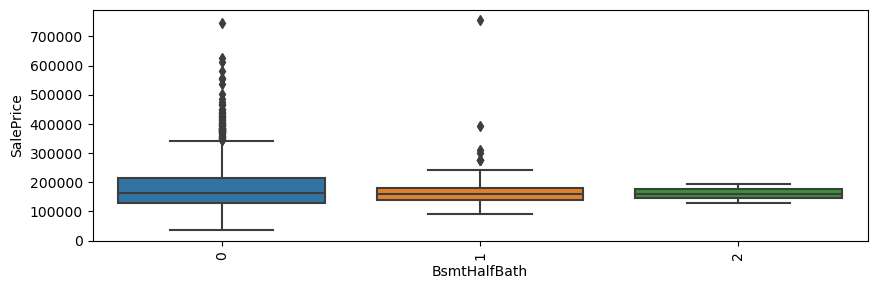

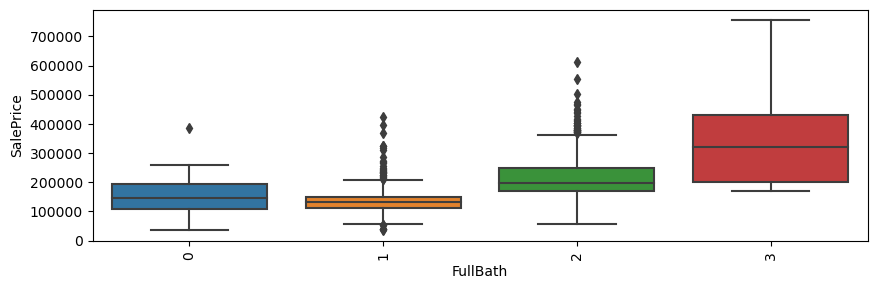

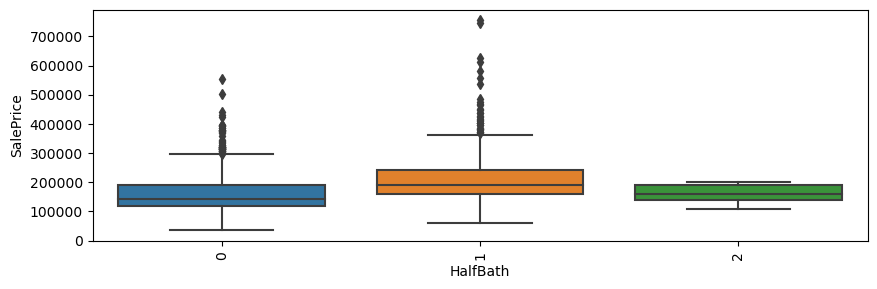

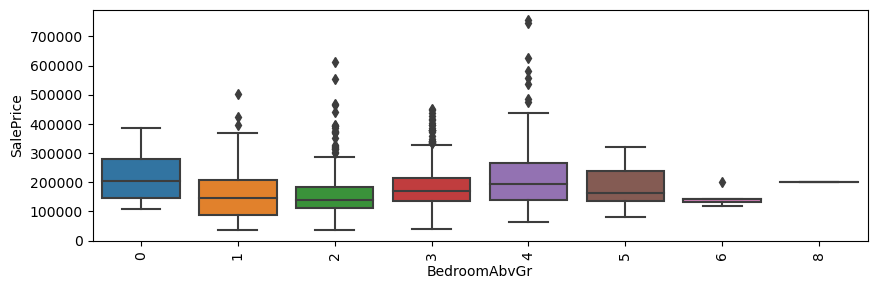

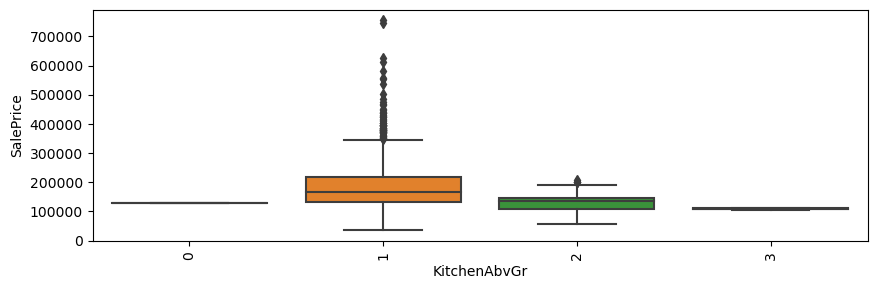

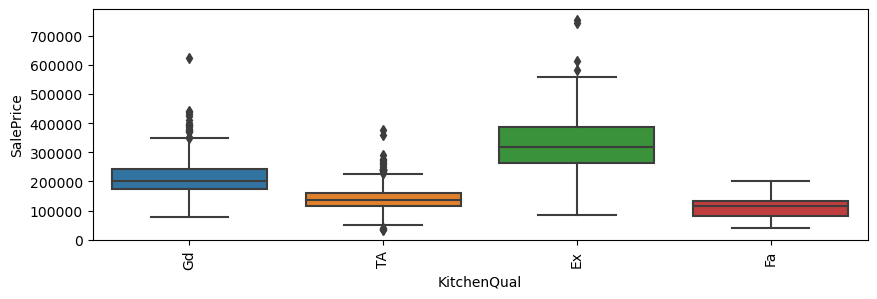

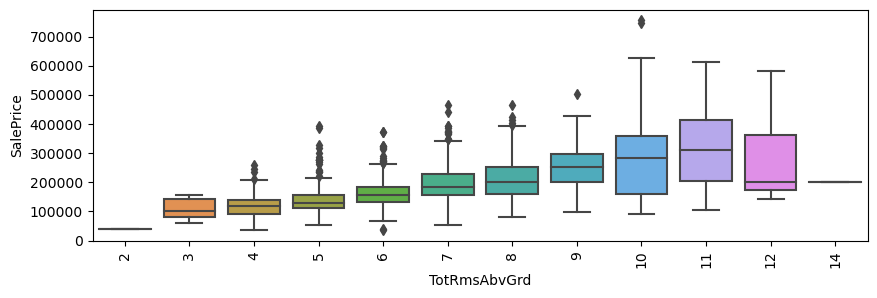

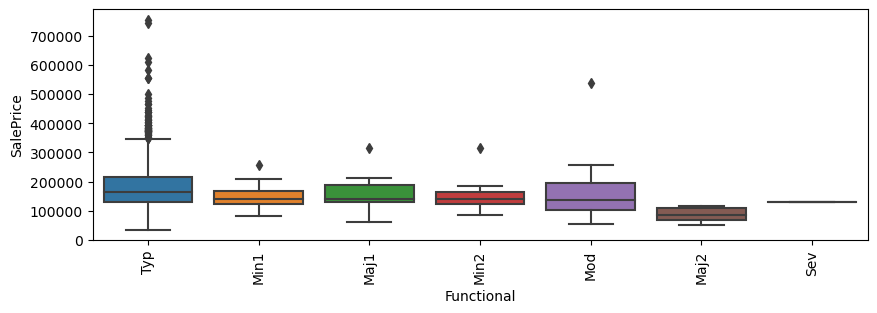

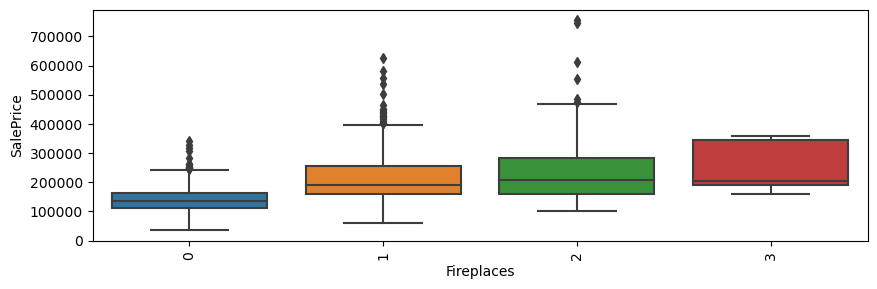

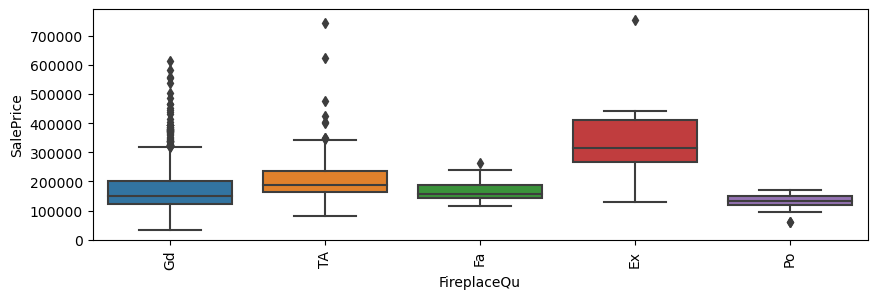

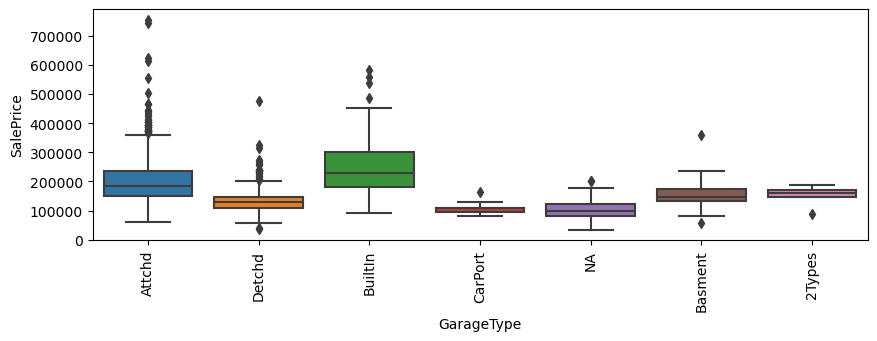

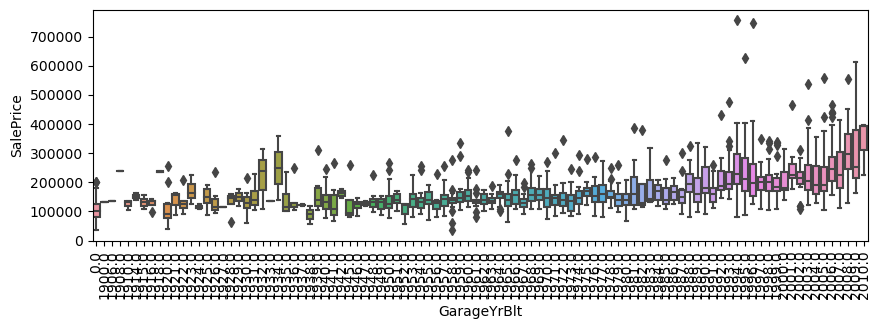

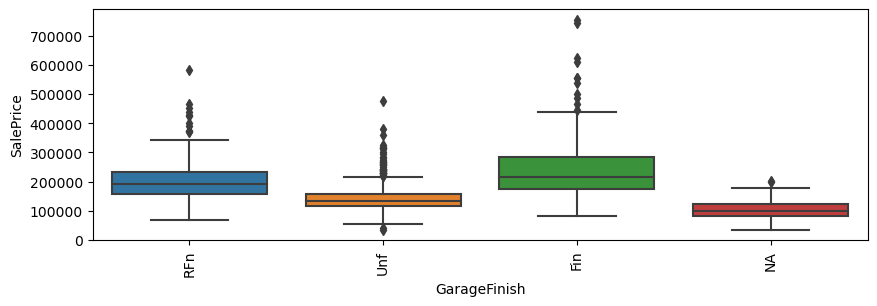

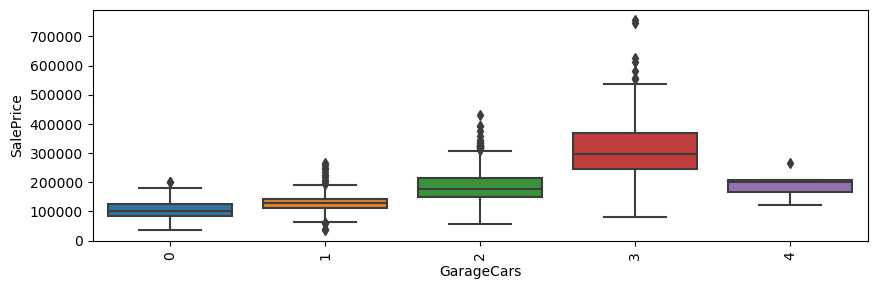

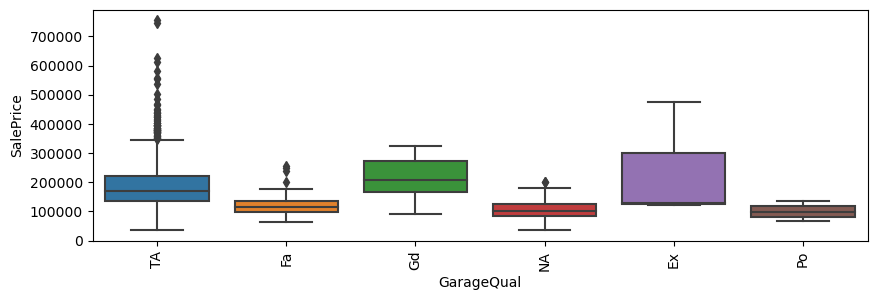

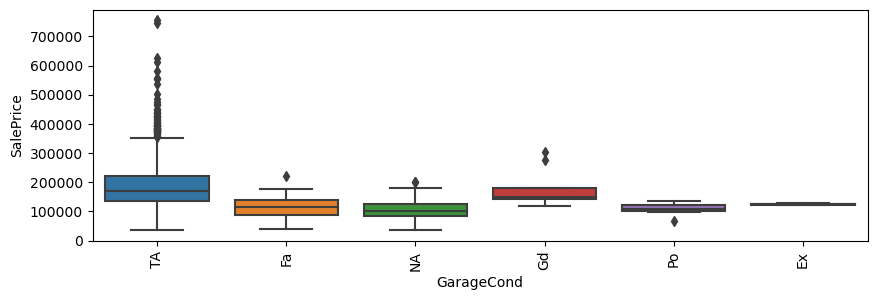

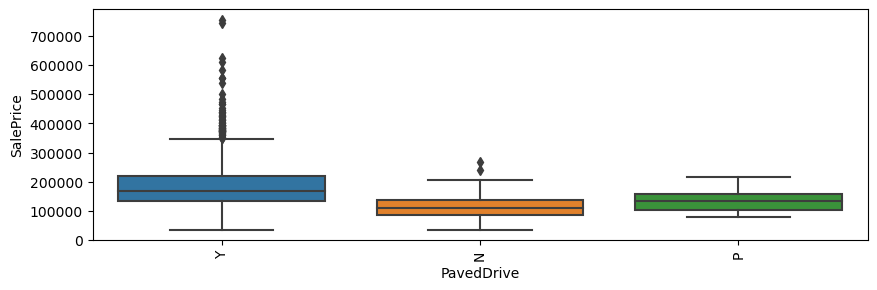

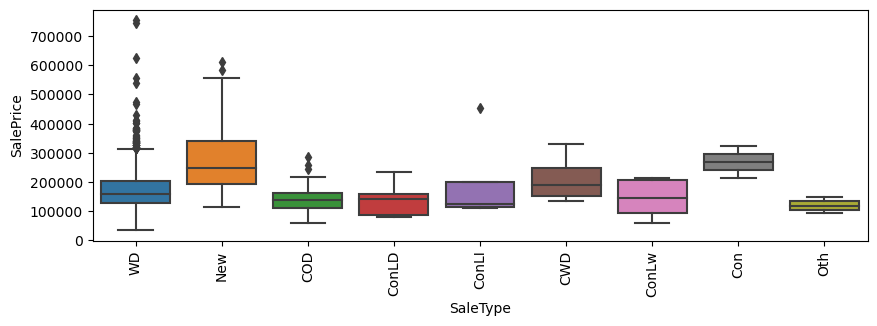

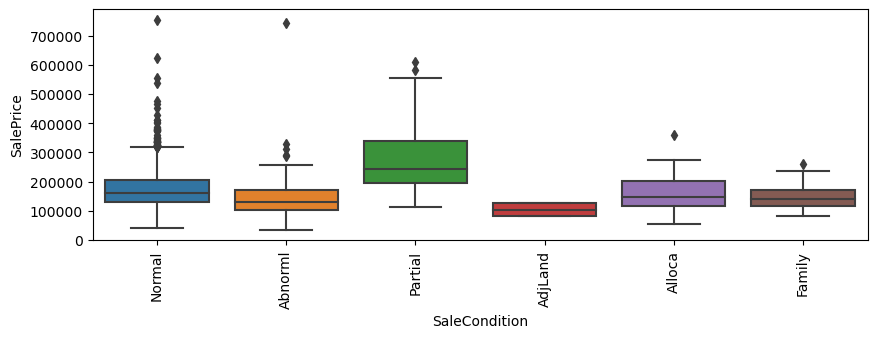

In [27]:
for var in housing_cat.columns:
    plt.figure(figsize=[10,3])
    plt.xticks(rotation=90)
    sns.boxplot(x=housing[var], y=housing['SalePrice'])

In [28]:
num_cols = housing_num.columns
cat_cols = housing_cat.columns

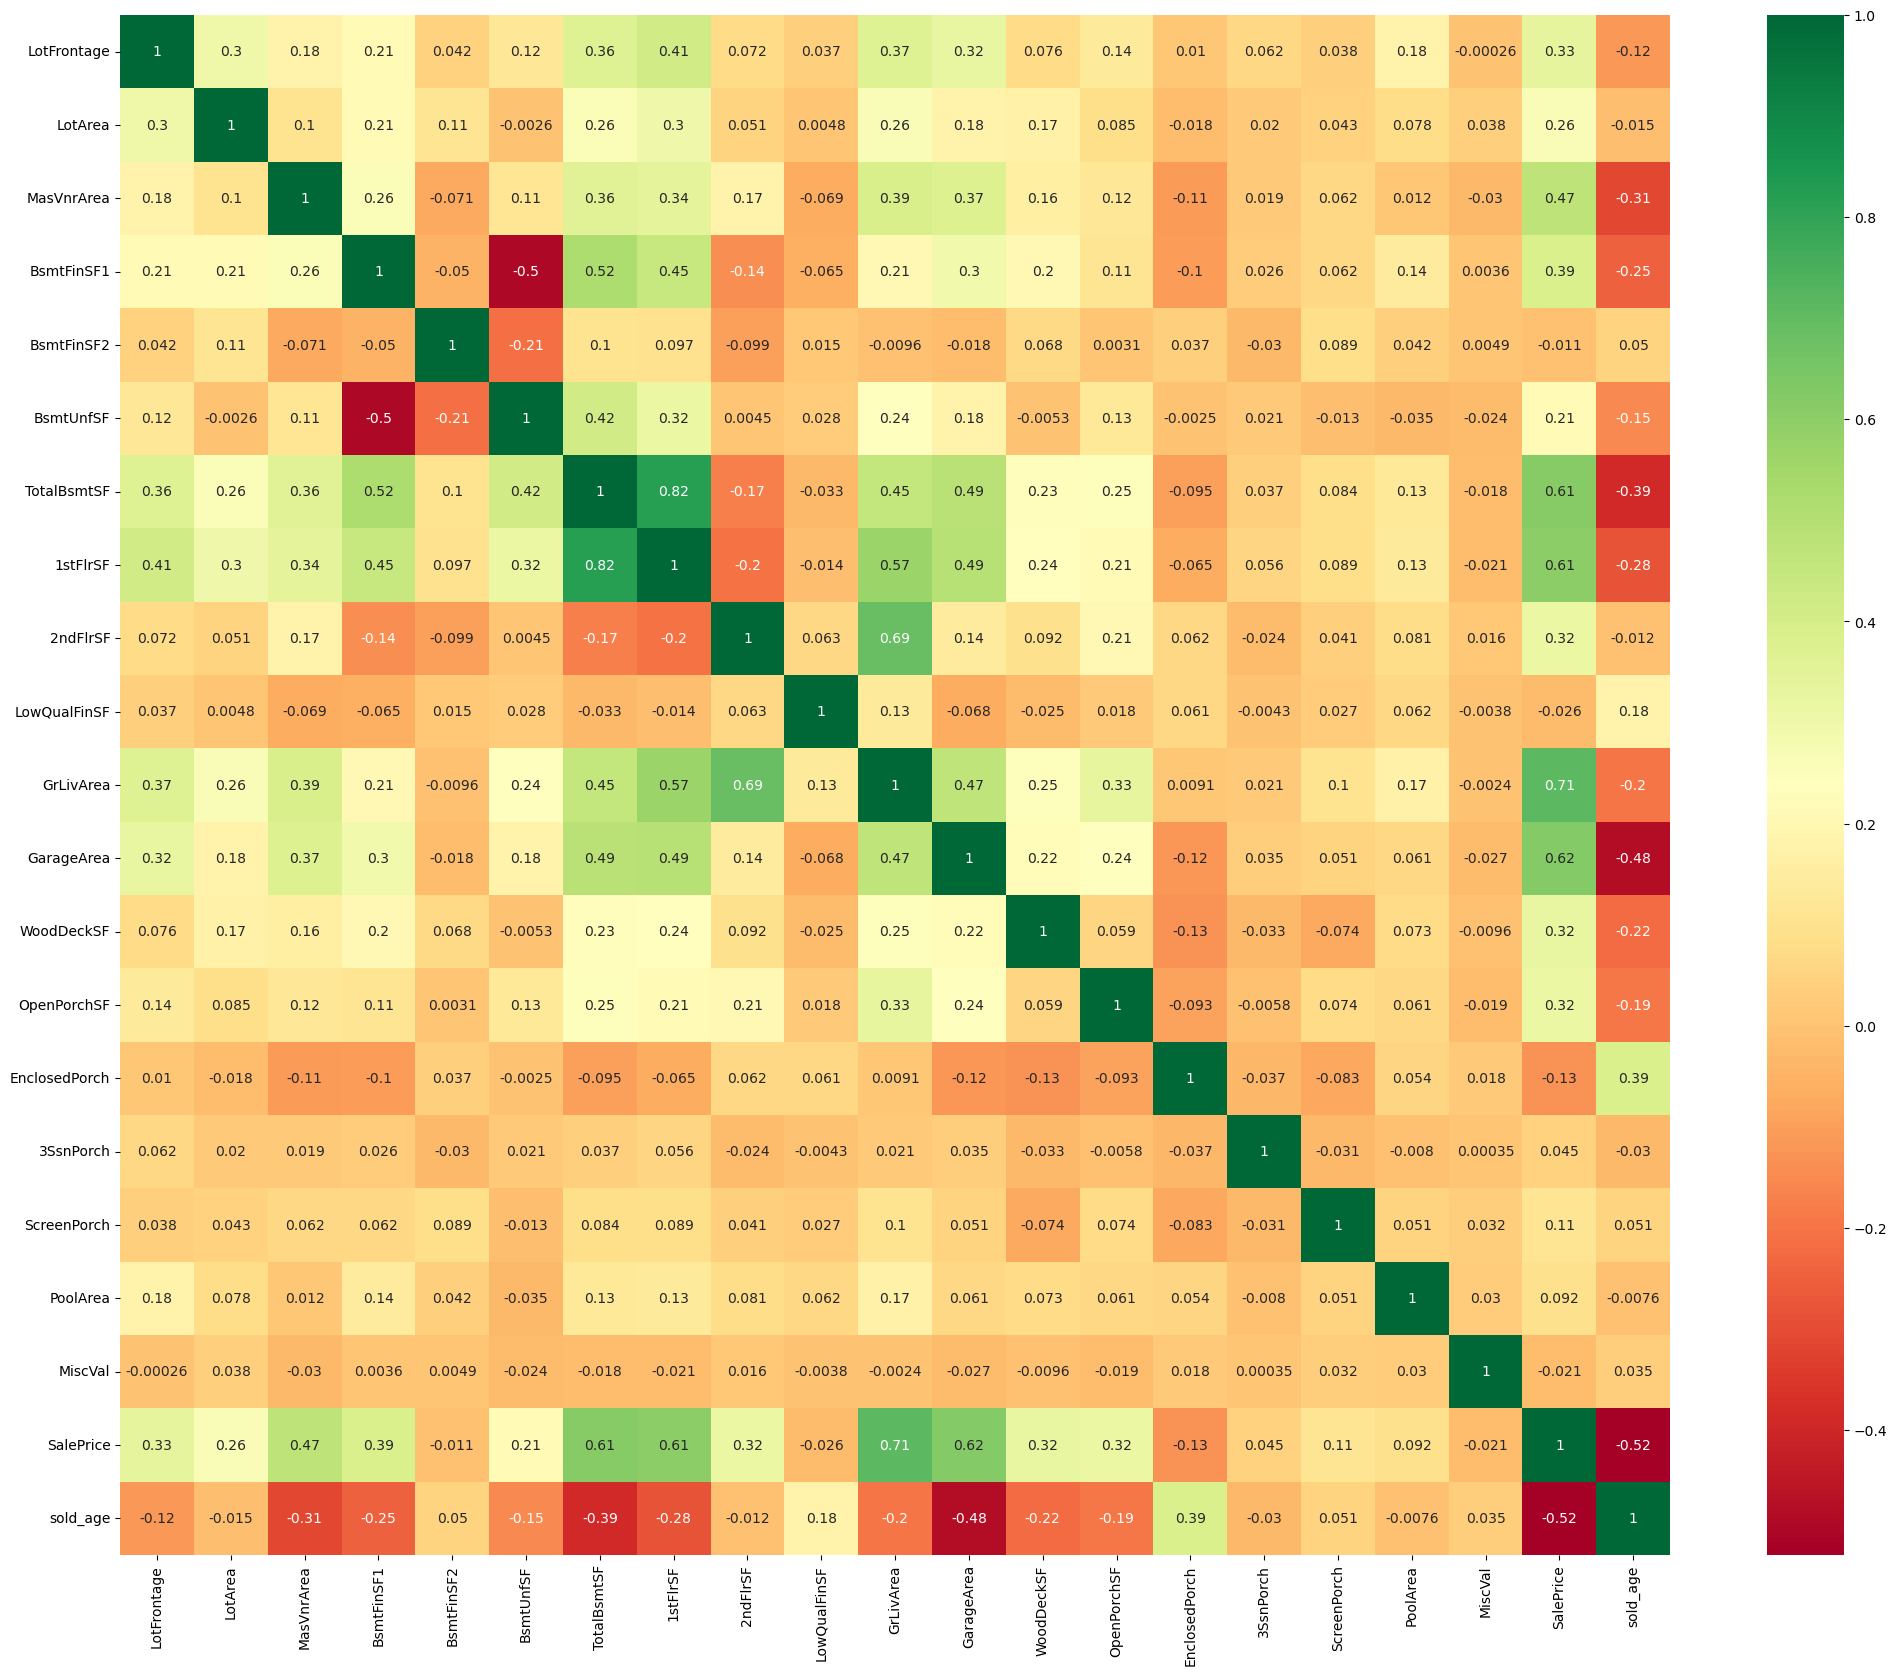

In [29]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(housing_num.corr(), annot=True, cmap='RdYlGn');

High positive correlation with SalePrice:
- Grade Living Area
- Total basement square feet
- 1st floor square feet
- Garage area
- Masonry veneer area 

High Negative Correlation with SalePrice:
- Sold_age : Age of House at the time of sale

In [30]:
housing[num_cols].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  sold_age  
0        0     208500         5  
1        0     181500        31  
2        0     223500         7  
3        0     140000        91  
4        0     250000         8

In [31]:
# creating dummy variables for Housestyle, building type, total rooms, exterior covering of home
house_style = pd.get_dummies(housing[['HouseStyle', 'BldgType', 'TotRmsAbvGrd', 'Exterior1st']], dtype=int, drop_first=True)
housing = pd.concat([housing, house_style],axis=1)
housing.drop(['HouseStyle', 'BldgType', 'TotRmsAbvGrd', 'Exterior1st'], axis=1, inplace=True)

In [32]:
housing_num = housing.select_dtypes(include=['float64', 'int64'])
print("Numerical Columns: \n \n",housing_num.columns,"\n")

housing_cat = housing.select_dtypes(include=['object'])
print("categorical Columns: \n\n",housing_cat.columns,"\n")

Numerical Columns: 
 
 Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
       'sold_age'],
      dtype='object') 

categorical Columns: 

 Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYr

In [33]:
# Label encoding all categorical columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for cat_col in housing_cat.columns:
    housing[cat_col] = encoder.fit_transform(housing[cat_col])

housing.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0           5         3         65.0     8450       1         3            3   
1           0         3         80.0     9600       1         3            3   
2           5         3         68.0    11250       1         0            3   
3           6         3         60.0     9550       1         0            3   
4           5         3         84.0    14260       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  OverallQual  \
0          4          0             5           2           2            6   
1          2          0            24           1           2            5   
2          4          0             5           2           2            6   
3          0          0             6           2           2            6   
4          2          0            15           2           2            7   

   OverallCond  YearRemodAdd  RoofStyle  RoofMatl  Exterior2nd  MasVnrArea  \
0            4            53          1         1           13       196.0   
1            7            26          1         1            8         0.0   
2            4            52          1         1           13       162.0   
3            4            20          1         1           15         0.0   
4            4            50          1         1           13       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4           2         2         4             4   
1          3          4           1         2         4             1   
2          2          4           2         2         4             2   
3          3          4           0         4         1             4   
4          2          4           2         2         4             0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             2         706             6           0        150          856   
1             0         978             6           0        284         1262   
2             2         486             6           0        434          920   
3             0         216             6           0        540          756   
4             2         655             6           0        490         1145   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          0           1           4       856       854   
1        1          0           1           4      1262         0   
2        1          0           1           4       920       866   
3        1          2           1           4       961       756   
4        1          0           1           4      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  Fireplaces  \
0             3             1            2           6           0   
1             3             1            3           6           1   
2             3             1            2           6           1   
3             3             1            2           6           1   
4             4             1            2           6           1   

   FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0            2           1           90             2           2         548   
1            4           1           63             2           2         460   
2            4           1           88             2           2         608   
3            2           5   

In [34]:
housing_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
housing.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0           5         3         65.0     8450       1         3            3   
1           0         3         80.0     9600       1         3            3   
2           5         3         68.0    11250       1         0            3   
3           6         3         60.0     9550       1         0            3   
4           5         3         84.0    14260       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  OverallQual  \
0          4          0             5           2           2            6   
1          2          0            24           1           2            5   
2          4          0             5           2           2            6   
3          0          0             6           2           2            6   
4          2          0            15           2           2            7   

   OverallCond  YearRemodAdd  RoofStyle  RoofMatl  Exterior2nd  MasVnrArea  \
0            4            53          1         1           13       196.0   
1            7            26          1         1            8         0.0   
2            4            52          1         1           13       162.0   
3            4            20          1         1           15         0.0   
4            4            50          1         1           13       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4           2         2         4             4   
1          3          4           1         2         4             1   
2          2          4           2         2         4             2   
3          3          4           0         4         1             4   
4          2          4           2         2         4             0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             2         706             6           0        150          856   
1             0         978             6           0        284         1262   
2             2         486             6           0        434          920   
3             0         216             6           0        540          756   
4             2         655             6           0        490         1145   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          0           1           4       856       854   
1        1          0           1           4      1262         0   
2        1          0           1           4       920       866   
3        1          2           1           4       961       756   
4        1          0           1           4      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  Fireplaces  \
0             3             1            2           6           0   
1             3             1            3           6           1   
2             3             1            2           6           1   
3             3             1            2           6           1   
4             4             1            2           6           1   

   FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0            2           1           90             2           2         548   
1            4           1           63             2           2         460   
2            4           1           88             2           2         608   
3            2           5   

### Preparing Data for Modelling

In [36]:
# split into test and train
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)

In [37]:
# scale numerical columns using minmaxscaler

scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [38]:
# split X_train, y_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [39]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       ...
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'],
      dtype='object', length=103)

In [40]:
y_train.head()

318     0.312595
239     0.108457
986     0.114012
1416    0.121650
390     0.116789
Name: SalePrice, dtype: float64

In [41]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
318            5         3     0.236301  0.039403       1         3   
239            4         3     0.106164  0.033981       1         3   
986            4         4     0.130137  0.017931       1         3   
1416          14         4     0.133562  0.046139       1         3   
390            4         3     0.099315  0.032409       1         3   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
318             2          4          1            15           2           2   
239             3          4          0             7           2           2   
986             3          0          0            17           1           2   
1416            3          4          0            17           2           2   
390             3          4          0             7           2           2   

      OverallQual  OverallCond  YearRemodAdd  RoofStyle  RoofMatl  \
318             6            4            43          1         1   
239             5            3             0          1         1   
986             5            7            53          3         1   
1416            3            5             0          1         1   
390             4            7             0          1         1   

      Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
318             6        0.16          2          4           2         2   
239            13        0.00          3          4           1         4   
986            13        0.00          3          2           1         4   
1416            0        0.00          3          4           2         4   
390             8        0.00          3          4           0         4   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
318          4             1             2    0.174876             6   
239          0             4             3    0.016655             6   
986          0             4             6    0.000000             6   
1416         4             4             6    0.000000             6   
390          1             4             5    0.042700             1   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
318     0.000000   0.154110     0.220458        1          0           1   
239     0.000000   0.274401     0.120295        1          4           1   
986     0.000000   0.207620     0.079378        1          2           1   
1416    0.000000   0.332620     0.127169        1          2           1   
390     0.265265   0.098031     0.140917        1          0           1   

      Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
318            4  0.231481  0.616949           0.0   0.424289             1   
239            0  0.098611  0.333656           0.0   0.201576             0   
986            4  0.145602  0.307022           0.0   0.230015             0   
1416           4  0.202315  0.505569           0.0   0.355880             0   
390            4  0.136343  0.196610           0.0   0.178517             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
318              0         2         1             4             1   
239              0         1         1             3             1   
986              0         1         0             2             1   
1416             0         2         0             4             2   
390              0         1         0             4             1   

      KitchenQual  Functional  Fireplaces  FireplaceQu  GarageType  \
318             2           6           1            4           1   
239             3           6           1            2           5   
986             2           6           0            2           1   
1416            3           6           0            2           5   
390             3           6           0            2           5   

      G

### Building Model

In [42]:
# building linear model 
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [43]:
len(X_train.columns)

103

In [44]:
# scaling df_test numerical columns
df_test[num_cols] = scaler.transform(df_test[num_cols])
# splitting X_test and y_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [45]:
# predictions from X_train
y_pred_train = reg.predict(X_train)

# predictions from X_test
y_pred_test = reg.predict(X_test)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_lr.append(mse_test_lr**0.5)

0.8585754405984802
0.8148944313922158
1.740548973137578
1.008704080497235
0.0017047492391161392
0.0022977313906542935


## RFE(Recursive Feature Elimination)

In [46]:
# performing Feature elimination using 40 variables
rfe = RFE(estimator=reg, n_features_to_select=40)
rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 45),
 ('MSZoning', False, 30),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('Street', True, 1),
 ('LotShape', False, 39),
 ('LandContour', False, 7),
 ('LotConfig', False, 51),
 ('LandSlope', True, 1),
 ('Neighborhood', False, 49),
 ('Condition1', False, 57),
 ('Condition2', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 4),
 ('YearRemodAdd', False, 61),
 ('RoofStyle', False, 40),
 ('RoofMatl', False, 5),
 ('Exterior2nd', False, 37),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 60),
 ('Foundation', False, 48),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 42),
 ('BsmtExposure', False, 22),
 ('BsmtFinType1', False, 38),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 63),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 12),
 ('TotalBsmtSF', True, 1),
 ('Heating', False, 54),
 ('HeatingQC', False, 59),
 ('CentralAir', False, 35),
 ('Electrical', False, 46),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQual

In [47]:
# list of rfe supported columns
cols = X_train.columns[rfe.support_]

In [48]:
# updating rfe supported columns to X_train
X_train = X_train[cols]

In [49]:
# updating rfe supported columns to X_test
X_test = X_test[cols]

In [50]:
# building linear model again with updated columns list
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

## Ridge Regression

In [51]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
print(model_cv.best_params_)

{'alpha': 1.0}


In [53]:
#Fitting Ridge model for alpha = 1.0
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge()

In [54]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric_ridge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric_ridge.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss1_ridge)
metric_ridge.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print(rss2_ridge)
metric_ridge.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric_ridge.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge)
metric_ridge.append(mse_test_ridge**0.5)


0.837177681843172
0.8157435741325222
2.0038967762815707
1.0040768088623846
0.001962680486074016
0.0022871909085703523


In [618]:
# R2 scores of train and test are high and values are close to each other which indicate good model. Lets also check metrics after Lasso regression

Text(0.5, 0, 'predicted SalePrice')

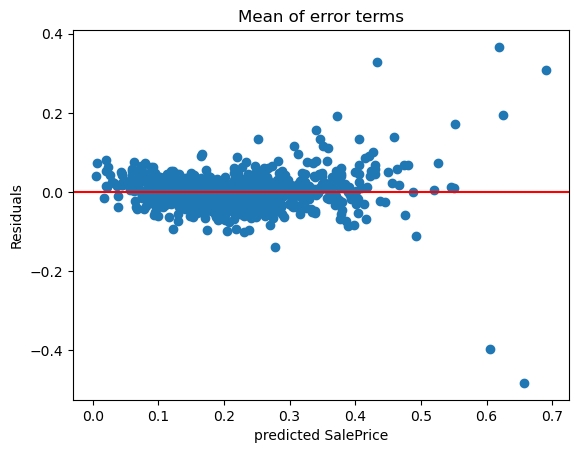

In [55]:
# plot between residuals and predicted saleprice
res = y_train - y_pred_train
plt.scatter(y_pred_train, res)
plt.title('Mean of error terms')
plt.axhline(y=0, color='red')
plt.ylabel("Residuals")
plt.xlabel("predicted SalePrice")

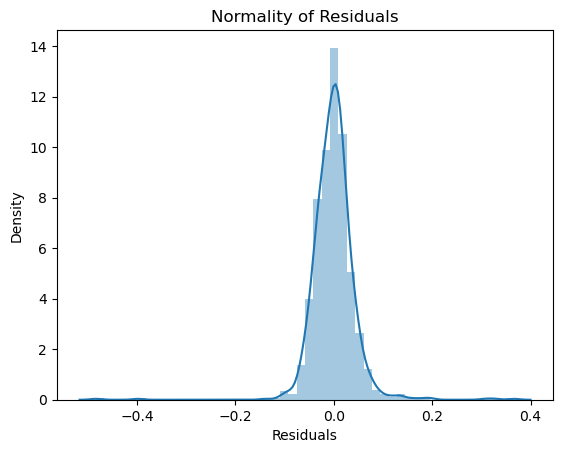

In [56]:
# distribution plot of errors
sns.distplot(res)
plt.xlabel('Residuals')
plt.title('Normality of Residuals')
plt.show()

##### Assumptions of linear regression satisfied
- Homoscedasticity
- Normality of Error terms
- mean of errors as zero

## Lasso Regression

In [57]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [59]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.00779401  0.06370725  0.03448828  0.01124269 -0.00825046  0.02271037
  0.06436347 -0.01070782 -0.00810966  0.04167942  0.00264765  0.00378256
  0.          0.04395118  0.29858666  0.01688605 -0.0336515  -0.01390467
  0.0156818   0.03373628  0.00350999  0.01494177 -0.00075107  0.
 -0.03568761  0.00317045  0.01862734 -0.02109758 -0.         -0.01559572
 -0.03162451 -0.02898168  0.01216924  0.04902803 -0.02739621 -0.01807135
 -0.0046084   0.02891369 -0.         -0.03031439]


In [60]:
# After performing Lasso Regression Insignificant variables coefficients became zeros

In [61]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric_lasso.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print(rss1_lasso)
metric_lasso.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print(rss2_lasso)
metric_lasso.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric_lasso.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso)
metric_lasso.append(mse_test_lasso**0.5)


0.8341048694360653
0.8191455862789186
2.0417146807704896
0.9855380714284915
0.0019997205492365226
0.0022449614383336937


In [62]:
# creating a dictionary with all models metrics to get compare view
metrics_table = {'Metric' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'RMSE (Train)','RMSE (Test)'],
                 'Ridge Regression': metric_ridge,
                 'Lasso Regression': metric_lasso }

# metric_ridge - has list of Ridge regression metrics
# metric_lasso - has list of Lasso regression metrics

# converting dictionary to pandas dataframe
metrics_table = pd.DataFrame(metrics_table, columns = ['Metric',  'Ridge Regression', 'Lasso Regression'])
metrics_table

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.837178          0.834105
1   R2 Score (Test)          0.815744          0.819146
2       RSS (Train)          2.003897          2.041715
3        RSS (Test)          1.004077          0.985538
4      RMSE (Train)          0.044302          0.044718
5       RMSE (Test)          0.047825          0.047381

In [63]:
# Lasso performs bit best compared to ridge.

## Lets observe the changes in the coefficients after regularization

In [64]:
# creating a dataframe with rows as X_train columns
betas = pd.DataFrame(index=X_train.columns)

In [65]:
betas.rows = X_train.columns

In [66]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [67]:
X_train.shape

(1021, 40)

In [68]:
pd.set_option('display.max_rows', None)
betas

Ridge     Lasso
LotFrontage         -0.032428 -0.007794
LotArea              0.079635  0.063707
Street               0.050284  0.034488
LandSlope            0.011170  0.011243
Condition2          -0.010758 -0.008250
OverallQual          0.021961  0.022710
MasVnrArea           0.066007  0.064363
ExterQual           -0.011332 -0.010708
BsmtQual            -0.008060 -0.008110
BsmtFinSF1           0.056001  0.041679
BsmtFinSF2           0.012102  0.002648
TotalBsmtSF          0.044655  0.003783
1stFlrSF             0.106924  0.000000
2ndFlrSF             0.119521  0.043951
GrLivArea            0.135936  0.298587
BsmtFullBath         0.015090  0.016886
KitchenAbvGr        -0.032241 -0.033651
KitchenQual         -0.014562 -0.013905
GarageCars           0.015642  0.015682
WoodDeckSF           0.035628  0.033736
3SsnPorch            0.024433  0.003510
ScreenPorch          0.018488  0.014942
PoolArea            -0.023251 -0.000751
MiscVal              0.022208  0.000000
sold_age            -0.036639 -0.035688
HouseStyle_1.5Unf    0.010199  0.003170
HouseStyle_1Story    0.019217  0.018627
HouseStyle_2.5Fin   -0.031799 -0.021098
HouseStyle_2.5Unf   -0.012018 -0.000000
HouseStyle_2Story   -0.019345 -0.015596
BldgType_Twnhs      -0.035861 -0.031625
BldgType_TwnhsE     -0.032149 -0.028982
TotRmsAbvGrd_9       0.013625  0.012169
TotRmsAbvGrd_10      0.051102  0.049028
TotRmsAbvGrd_11     -0.031919 -0.027396
TotRmsAbvGrd_12     -0.028123 -0.018071
Exterior1st_BrkComm -0.035632 -0.004608
Exterior1st_BrkFace  0.030639  0.028914
Exterior1st_Stone   -0.005292 -0.000000
Exterior1st_Stucco  -0.031317 -0.030314

In [69]:
# Top 5 predictor variables using Lasso regression are
betas.sort_values(by='Lasso', ascending=False).head()

Ridge     Lasso
GrLivArea        0.135936  0.298587
MasVnrArea       0.066007  0.064363
LotArea          0.079635  0.063707
TotRmsAbvGrd_10  0.051102  0.049028
2ndFlrSF         0.119521  0.043951

In [70]:
# Top 5 predictor variables using Ridge regression are
betas.sort_values(by='Ridge', ascending=False).head()

Ridge     Lasso
GrLivArea   0.135936  0.298587
2ndFlrSF    0.119521  0.043951
1stFlrSF    0.106924  0.000000
LotArea     0.079635  0.063707
MasVnrArea  0.066007  0.064363

In [637]:
max(lasso.coef_)

0.29858666291281905

In [638]:
max(ridge.coef_)

0.13593613543032473

In [79]:
# 36 predictor variables of SalePrice after lasso regression are
betas[betas.Lasso != 0.0000].sort_values(by='Lasso', ascending=False)

Ridge     Lasso
GrLivArea            0.135936  0.298587
MasVnrArea           0.066007  0.064363
LotArea              0.079635  0.063707
TotRmsAbvGrd_10      0.051102  0.049028
2ndFlrSF             0.119521  0.043951
BsmtFinSF1           0.056001  0.041679
Street               0.050284  0.034488
WoodDeckSF           0.035628  0.033736
Exterior1st_BrkFace  0.030639  0.028914
OverallQual          0.021961  0.022710
HouseStyle_1Story    0.019217  0.018627
BsmtFullBath         0.015090  0.016886
GarageCars           0.015642  0.015682
ScreenPorch          0.018488  0.014942
TotRmsAbvGrd_9       0.013625  0.012169
LandSlope            0.011170  0.011243
TotalBsmtSF          0.044655  0.003783
3SsnPorch            0.024433  0.003510
HouseStyle_1.5Unf    0.010199  0.003170
BsmtFinSF2           0.012102  0.002648
PoolArea            -0.023251 -0.000751
Exterior1st_BrkComm -0.035632 -0.004608
LotFrontage         -0.032428 -0.007794
BsmtQual            -0.008060 -0.008110
Condition2          -0.010758 -0.008250
ExterQual           -0.011332 -0.010708
KitchenQual         -0.014562 -0.013905
HouseStyle_2Story   -0.019345 -0.015596
TotRmsAbvGrd_12     -0.028123 -0.018071
HouseStyle_2.5Fin   -0.031799 -0.021098
TotRmsAbvGrd_11     -0.031919 -0.027396
BldgType_TwnhsE     -0.032149 -0.028982
Exterior1st_Stucco  -0.031317 -0.030314
BldgType_Twnhs      -0.035861 -0.031625
KitchenAbvGr        -0.032241 -0.033651
sold_age            -0.036639 -0.035688

### Question1: Double alpha values

In [80]:
# Doubling alpha for ridge regression
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=2.0)

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric_ridge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric_ridge.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss1_ridge)
metric_ridge.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print(rss2_ridge)
metric_ridge.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric_ridge.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge)
metric_ridge.append(mse_test_ridge**0.5)


0.8351827758893857
0.8180137197507084
2.028448604649024
0.9917060024862712
0.0019867273307042355
0.002259011395185128


In [82]:
# Doubling alpha for lasso regression
alpha = 0.0002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)


Lasso(alpha=0.0002)

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_lasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_lasso.append(mse_test_lr**0.5)


0.8283778653687739
0.8218989686460707
2.112198414929972
0.9705339413539376
0.0020687545689813632
0.002210783465498719


In [84]:
# creating a dictionary with all models metrics to get compare view
metrics_table = {'Metric' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'],
     'Ridge Regression': metric_lasso,
     'Lasso Regression': metric_ridge }

# converting dictionary to pandas dataframe
metrics_table = pd.DataFrame(metrics_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'])
metrics_table

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.828378          0.835183
1   R2 Score (Test)          0.821899          0.818014
2       RSS (Train)          2.112198          2.028449
3        RSS (Test)          0.970534          0.991706
4      RMSE (Train)          0.045484          0.044573
5       RMSE (Test)          0.047019          0.047529

## Lets observe the changes in the coefficients after regularization

In [85]:
betas = pd.DataFrame(index=X_train.columns)

In [86]:
betas.rows = X_train.columns

In [87]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [88]:
X_train.shape

(1021, 40)

In [89]:
pd.set_option('display.max_rows', None)
betas

Ridge     Lasso
LotFrontage         -0.019115 -0.000000
LotArea              0.059907  0.007730
Street               0.041393  0.000787
LandSlope            0.012365  0.012818
Condition2          -0.009870 -0.006160
OverallQual          0.023145  0.024268
MasVnrArea           0.063950  0.059417
ExterQual           -0.011361 -0.009835
BsmtQual            -0.008162 -0.008317
BsmtFinSF1           0.049890  0.023598
BsmtFinSF2           0.011401  0.000000
TotalBsmtSF          0.045892  0.000000
1stFlrSF             0.095051  0.000000
2ndFlrSF             0.107901  0.021175
GrLivArea            0.120559  0.295326
BsmtFullBath         0.015768  0.018864
KitchenAbvGr        -0.030272 -0.032617
KitchenQual         -0.014515 -0.013739
GarageCars           0.016255  0.016391
WoodDeckSF           0.036233  0.031159
3SsnPorch            0.020626  0.000000
ScreenPorch          0.018550  0.010621
PoolArea            -0.015380 -0.000000
MiscVal              0.015119  0.000000
sold_age            -0.033666 -0.030638
HouseStyle_1.5Unf    0.006322  0.000000
HouseStyle_1Story    0.017502  0.016199
HouseStyle_2.5Fin   -0.022902 -0.000000
HouseStyle_2.5Unf   -0.010678 -0.000000
HouseStyle_2Story   -0.016732 -0.009410
BldgType_Twnhs      -0.035284 -0.030864
BldgType_TwnhsE     -0.032309 -0.028873
TotRmsAbvGrd_9       0.015694  0.012752
TotRmsAbvGrd_10      0.052848  0.049009
TotRmsAbvGrd_11     -0.025248 -0.012853
TotRmsAbvGrd_12     -0.020071 -0.000000
Exterior1st_BrkComm -0.026244 -0.000000
Exterior1st_BrkFace  0.030987  0.027248
Exterior1st_Stone   -0.001871 -0.000000
Exterior1st_Stucco  -0.030271 -0.025914

In [90]:
betas.sort_values(by='Lasso', ascending=False).head()

Ridge     Lasso
GrLivArea            0.120559  0.295326
MasVnrArea           0.063950  0.059417
TotRmsAbvGrd_10      0.052848  0.049009
WoodDeckSF           0.036233  0.031159
Exterior1st_BrkFace  0.030987  0.027248

In [91]:
betas.sort_values(by='Ridge', ascending=False).head()

Ridge     Lasso
GrLivArea   0.120559  0.295326
2ndFlrSF    0.107901  0.021175
1stFlrSF    0.095051  0.000000
MasVnrArea  0.063950  0.059417
LotArea     0.059907  0.007730

## Question 3
After building the model, you realized that the five most important predictor variables in the lasso model are not
available in the incoming data. You will now have to create another model excluding the five most important predictor 
variables. Which are the five most important predictor variables now?


In [639]:
# top 5 variables after lasso regression
Top_5 = betas.sort_values(by='Lasso', ascending=False).head().index.values
Top_5

array(['GrLivArea', 'MasVnrArea', 'LotArea', 'TotRmsAbvGrd_10',
       '2ndFlrSF'], dtype=object)

In [640]:
X_train.shape

(1021, 40)

In [641]:
# dropping to_5 variables from X_train and rebuild the lasso model
X_train.drop(Top_5, axis=1, inplace=True)

# dropping top_5 variables from X_test as well
X_test.drop(Top_5, axis=1, inplace=True)

In [642]:
X_train.shape

(1021, 35)

## Ridge Regression

In [440]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [441]:
print(model_cv.best_params_)

{'alpha': 0.7}


In [442]:
#Fitting Ridge model for alpha = 10.0
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge()

In [443]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_ridge.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_ridge.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_ridge.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_ridge.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_ridge.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_ridge.append(mse_test_lr**0.5)


0.8237858234599114
0.8144783449620057
2.1687138735101437
1.0109714789507191
0.002124107613624039
0.0023028963074048273


In [444]:
# R2 scores of train and test are high and values are close to each other which indicate good model. Lets also check metrics after Lasso regression

## Lasso Regression

In [643]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [644]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [645]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.          0.04048579  0.01502493 -0.00349758  0.02729313 -0.01576998
 -0.00743731  0.05698482  0.          0.          0.29066748  0.01300183
 -0.02115061 -0.01365976  0.01782809  0.0414302   0.          0.01756602
 -0.          0.         -0.01524867 -0.01559373 -0.01222863  0.00861178
  0.          0.02376016 -0.04046735 -0.0371002   0.01914125 -0.0007897
 -0.         -0.          0.02498686 -0.         -0.02850072]


In [646]:
# After performing Lasso Regression Insignificant variables coefficients became zeros

In [647]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_lasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_lasso.append(mse_test_lr**0.5)


0.7959955395605943
0.8172913064206184
2.5107361524470657
0.99564268185982
0.0024590951542086833
0.002267978774168155


In [650]:

# creating a dictionary with all models metrics to get compare view
metrics_table = {'Metric' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'RMSE (Train)','RMSE (Test)'],
                'Lasso Regression': metric_lasso }

# metric_lr - has list of LinearRegression metrics
# metric_ridge - has list of Ridge regression metrics
# metric_lasso - has list of Lasso regression metrics

# converting dictionary to pandas dataframe
metrics_table = pd.DataFrame(metrics_table, columns = ['Metric', 'Lasso Regression'])
metrics_table

Metric  Lasso Regression
0  R2 Score (Train)          0.795996
1   R2 Score (Test)          0.817291
2       RSS (Train)          2.510736
3        RSS (Test)          0.995643
4      RMSE (Train)          0.049589
5       RMSE (Test)          0.047623

## Lets observe the changes in the coefficients after regularization

In [651]:
betas = pd.DataFrame(index=X_train.columns)

In [652]:
betas.rows = X_train.columns

In [653]:
betas['Lasso'] = lasso.coef_

In [654]:
X_train.shape

(1021, 35)

In [657]:
pd.set_option('display.max_rows', None)


In [658]:
# Top 5 predictor variables using Lasso regression are
betas.sort_values(by='Lasso', ascending=False).head()

Lasso
1stFlrSF     0.290667
BsmtFinSF1   0.056985
WoodDeckSF   0.041430
Street       0.040486
OverallQual  0.027293

In [660]:
pd.__version__

'2.2.0'

In [661]:
np.__version__

'1.24.3'

In [664]:
sns.__version__

'0.12.2'

In [666]:
import sklearn
sklearn.__version__

'1.3.0'

In [667]:
import matplotlib
matplotlib.__version__

'3.7.2'